### MIE370 Project 3 --- PCA

**Deadline: Nov 11th, 21:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the MIE370 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:

Full Name: Shreya Perumal  

Student ID: 1010207107

UTorID: perumal9

**Three submission files are required:**

For submitting this project, three files must be submitted on Quercus by the project deadline:

1) The complete Jupyter file containing all code and comments with outputs (in .ipynb format) (that completely compiles on Google colab without any errors regardless of the computer used.)

2) A self-contained and complete HTML printout of the same Jupyter file with all the output printed as well as all the code, text cells, comments, and figures.

3) Appendix pdf file of all prompts and all responses for all interactions you have had regarding this project with any AI assistant tool (Chat GPT etc.). If you do not use any AI assistant tool at all, this appendix pdf file is not needed.

**Policy regarding the use of AI assistant tools**

If you use a generative AI tool (e.g., ChatGPT, GitHub Copilot, or any other similar tool) to get ideas and/or partial answers for projects or assignments or to generate any code and/or text, you must declare in your submission the tools that you have used and describe the usage, and include in your submission an appendix that captures all the interactions (prompts and responses).

You will not be penalized for the declared use of such AI assistant tools, and the grading decisions will be based on your original contributions as well as the efforts that you make to check and/or correct the answers provided by the tool. Students are ultimately accountable for the work they submit. Failure to fully declare the use of this tool will be considered "unauthorized assistance" and will have consequences (See B.I. of the [U of T CODE OF BEHAVIOUR ON ACADEMIC MATTERS](https://governingcouncil.utoronto.ca/secretariat/policies/code-behaviour-academic-matters-july-1-2019))

##**Marking Scheme:**

This project is worth **9 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings.

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).




### How to obtain an **HTML** file from an **IPYNB** file

1. Download the IPYNB file of your complete project: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of a new Colab session

3. Select & upload your `.ipynb` file you just downloaded, and then copy its path (right click) (you might need to hit the Refresh button before your file shows up)


4. Replace XXXX with the copied path and then execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html XXXX
```

5. An HTML version of your notebook will appear in the Colab session files and you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus (before the deadline) for grading.



More info on coverting IPYNB to HTML: https://stackoverflow.com/a/64487858



# Project 3 **[100 Marks]**

In this project we work on [flight delays dataset](https://www.kaggle.com/datasets/gabrielluizone/us-domestic-flights-delay-prediction-2013-2018) that reports scheduled and actual departure and arrival times reported by certified US air carriers. This dataset contains date, origin, destination, airline, distance, and delay status of flights for flights between 2016 and 2018.

# Part 1: Getting started [9 Marks]

1. Write a function to do the following: **[3]**
    * Takes the dataframe, and the list of destination states as inputs (California, Colorado, North Carolina, Arizona, ...)
    * Plots time-series for the input list (it is best to plot each destination state in a separate graph (subplot), so you can easily compare them.)
    
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. **[2]**
3. Run the function in `step 1` on both the original as well as the standardized dataset for the `AZ`, `CA`, `IL` and `NC`.   **[2]**

4. Discuss the trends in the standardized time-series for `AZ`, `CA`, `IL` and `NC`. What does it mean if the curve goes up or down? What does the sign of values indicate? **[2]**

In [252]:
import pandas as pd
data_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/Sabaae/Dataset/main/TotalDelaysbyState.csv',
    index_col=0
)

Plotting Time Series for Original States Data: ['AZ', 'CA', 'IL', 'NC']


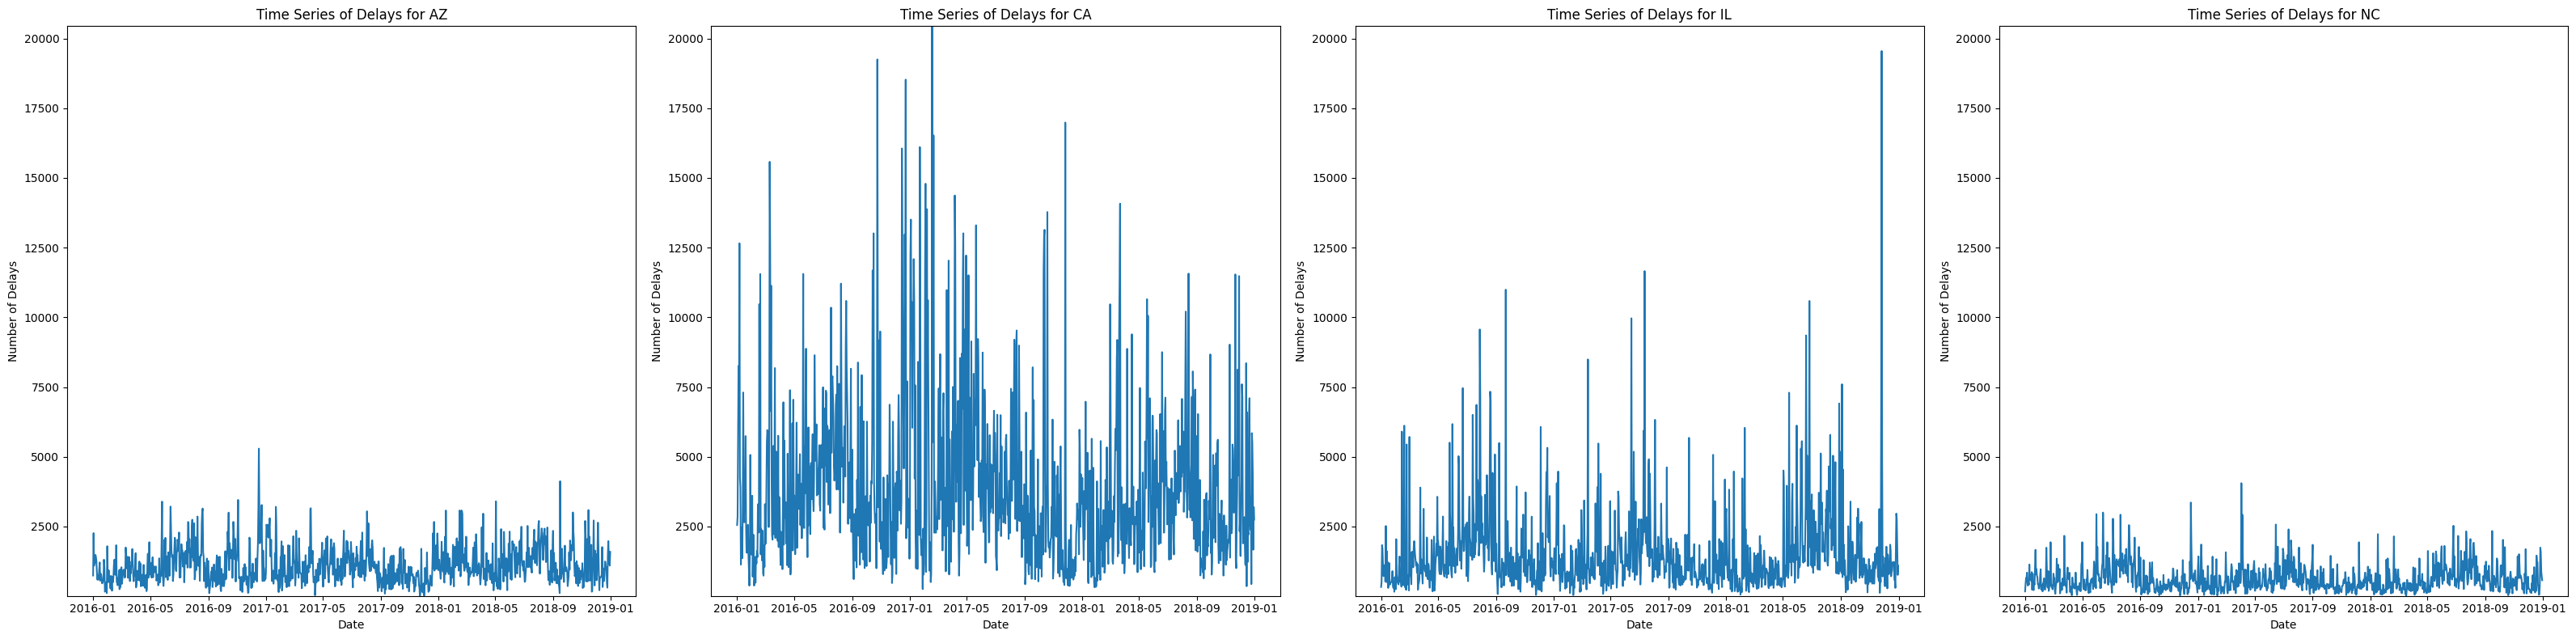

Plotting Time Series for Standardized States Data: ['AZ', 'CA', 'IL', 'NC']


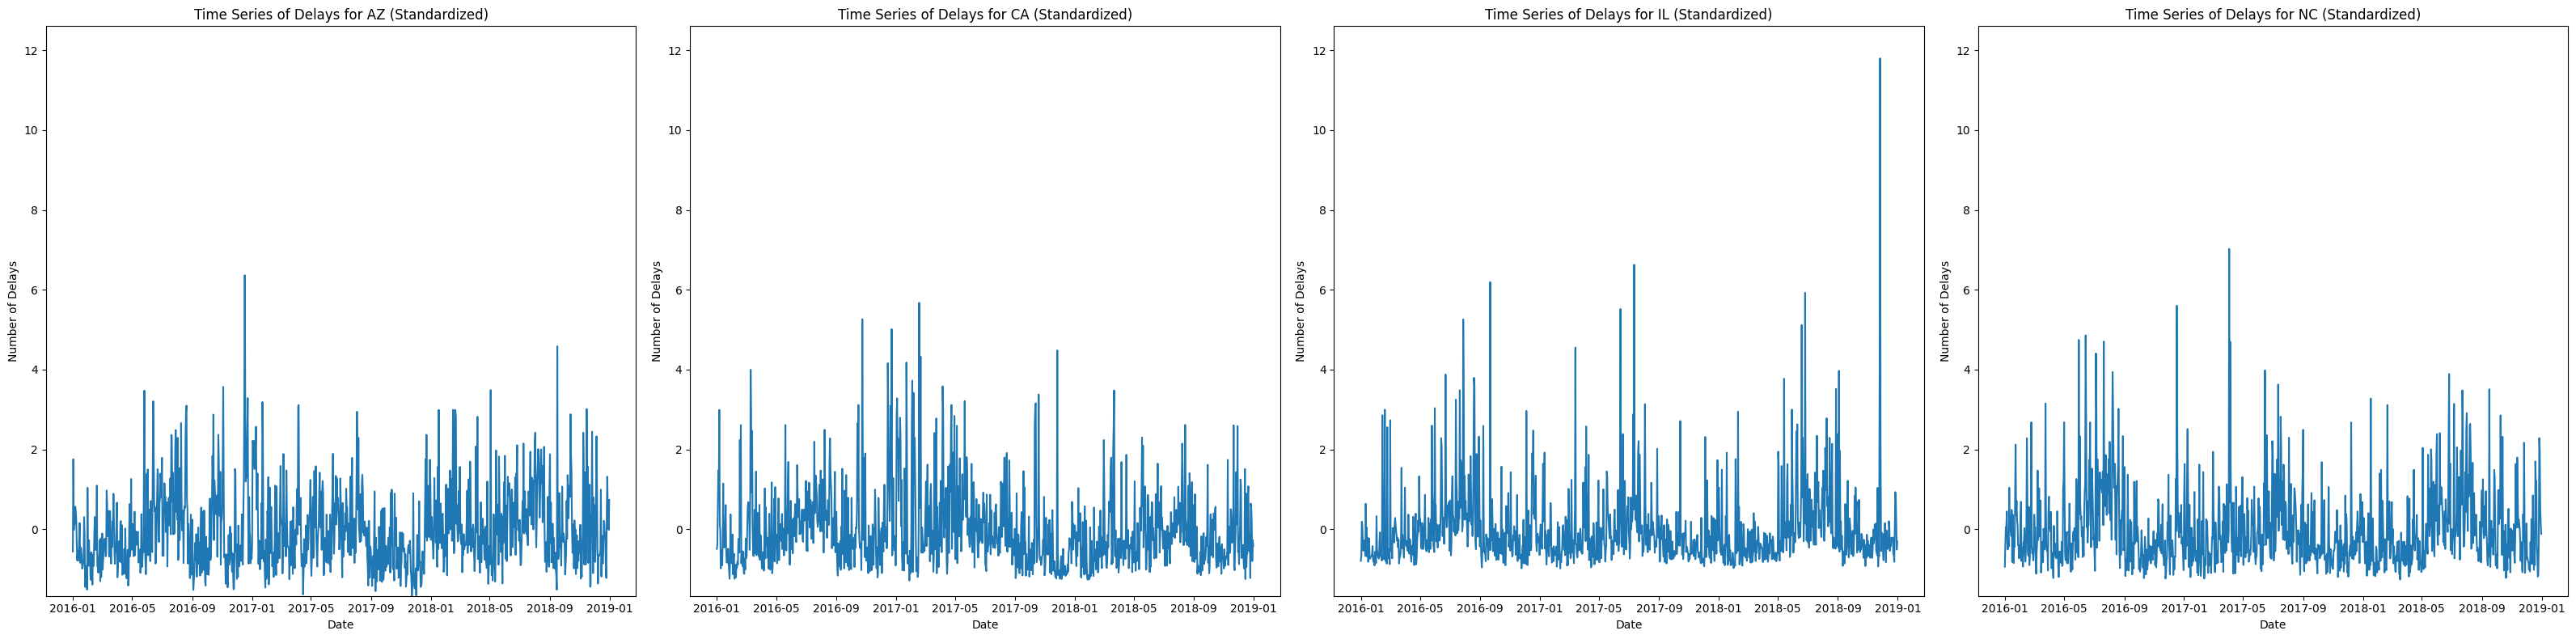

In [253]:
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

#Part 1.1: Plotting Time Series Function
def correct_format(data):
    df = data.copy()
    df = df.T
    df = pd.DataFrame(df.values, index=pd.to_datetime(df.index), columns=df.columns)
    return df

def plot_time_series(df, states, standardized=False):

    if not isinstance(df.index, pd.DatetimeIndex):
        df = correct_format(df)

    k = len(states)
    c = 0
    for i in range(k):
        if states[i] in df.columns:
            c += 1

    fig, _ = plt.subplots(1, c, figsize=(8*c, 8))

    y_max = df.max().max()
    y_min = df.min().min()

    for i in range(0,k):
        if states[i] in df.columns:
            plt.subplot(1, c, i+1)
            plt.plot(df.index, df[states[i]])
            plt.ylim(y_min, y_max)
            title = ('Time Series of Delays for ' + states[i] + ' (Standardized)' if standardized
                     else 'Time Series of Delays for ' + states[i])
            plt.title(title)
            plt.xlabel('Date')
            plt.ylabel('Number of Delays')


    fig.tight_layout()
    plt.show()

#Part 1.2: Standardize Data
def standardize_data(data):
    df = data.copy()
    df = correct_format(df)
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)
    return df_scaled

#Part 1.3: Run Function for Specific States
states = ['AZ', 'CA', 'IL', 'NC']
print("Plotting Time Series for Original States Data:", states)
plot_time_series(data_raw, states)

print("Plotting Time Series for Standardized States Data:", states)
data_standardized = standardize_data(data_raw)
plot_time_series(data_standardized, states, standardized=True)

#Part 1.4: Compare Original and Standardized Data
# Answered in markdown cell below


**Part 1.4:** Discuss the trends in the standardized time-series for `AZ`, `CA`, `IL` and `NC`. What does it mean if the curve goes up or down? What does the sign of values indicate?

The first row of graphs are unstandardized whereas the second row are all standardized. In the undstandardized graphs we can see that there are big differences from location to location, however the second row of graphs is easoly comparable as they show the data in terms of their repective averages. From lojug at these graphs it can be observed that during a time period in the first quarter of time, many flights were delayed most commonly.




# Part 2: Applying PCA [14 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be ((1095, 1095).* **[1]**
2. Write a function `get_sorted_eigen(df_cov)` that gets the covariance matrix of dataframe `df` (from step 1), and returns sorted eigenvalues and eigenvectors using `np.linalg.eigh`. **[2]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`. *Hint: Limit the scree plot to the first 10 PCs.* **[3]**
4. How many PCs do you need to cover 90% of the dataset's variance? **[1]**
5. Plot the first 16 principal components (Eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element) . **[5]**
6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? **[2]**

Raw Data Shape: (1095, 7)
Covariance Matrix Size: (1095, 1095)


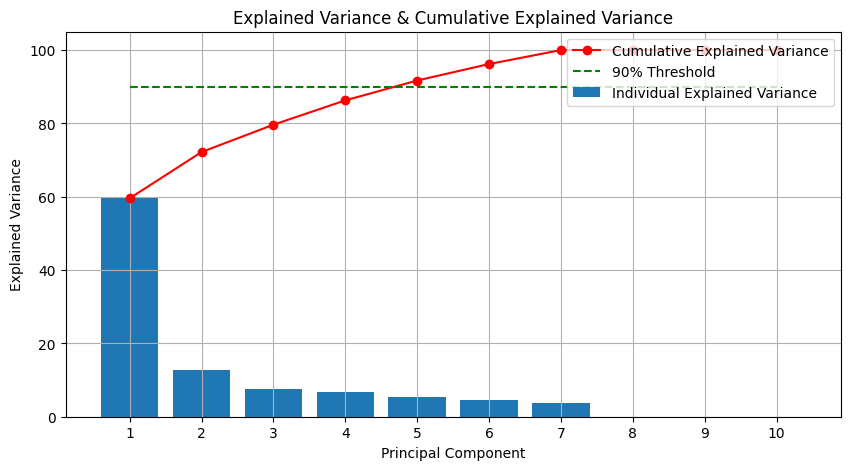

In [269]:
### YOUR CODE HERE ###
#Part 2.1 Covariance Matrix
print("Raw Data Shape:", data_standardized.shape)
n, m = data_standardized.shape
C = np.dot(data_standardized, data_standardized.T) / (n - 1)
print("Covariance Matrix Size:", C.shape)

#Part 2.2: Eigenvalues and Eigenvectors
def get_sorted_eigen(df_cov):
    eigenValues, eigenVectors = np.linalg.eigh(df_cov)
    idx = eigenValues.argsort()[::-1]
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:, idx]
    return eigenValues, eigenVectors

eigenValues, eigenVectors = get_sorted_eigen(C)

#print("Eigenvalues (sorted):", eigenValues)
#print("Eigenvectors (sorted):", eigenVectors)
#print(len(eigenValues), len(eigenVectors))


#Part 2.3: Effectiveness of Pricipal Components (Scree Plot)

#Calculate explained variance and cumulative explained variance
explained_variance = (eigenValues / np.sum(eigenValues)) * 100
cumulative_explained_variance = np.cumsum(explained_variance)
#print("Explained Variance:", explained_variance)
#print("Cumulative Explained Variance:", cumulative_explained_variance)

#Plot of Explained Variance & Cumulative Explained Variance
plt.figure(figsize=(10, 5))
plot_range = min(10, len(explained_variance))
#Bar Plot for Explained Variance
plt.bar(range(plot_range), explained_variance[:plot_range], label='Individual Explained Variance')
#Line Plot for Cumulative Explained Variance
plt.plot(cumulative_explained_variance[:plot_range], 'r-o', label='Cumulative Explained Variance')
#90% Threshold Line
plt.plot([0, plot_range-1], [90, 90], 'g--', label='90% Threshold')
plt.xlabel('Principal Component')
plt.xticks(range(plot_range), range(1, plot_range + 1))
plt.ylabel('Explained Variance')
plt.title('Explained Variance & Cumulative Explained Variance')
plt.legend(loc='upper right')
plt.grid()
plt.show()

#print("Explained Variance (%):", explained_variance)
#print("Cumulative Explained Variance (%):", cumulative_explained_variance)

#Part 2.4: Answered in markdown cell below

**Part 2.4:** Number of Principal Components for 90% Variance
Since the number of principal components closest to the 90% threshold is 5,
there must be at least 5 to cover the data variance.

(1095, 1095)


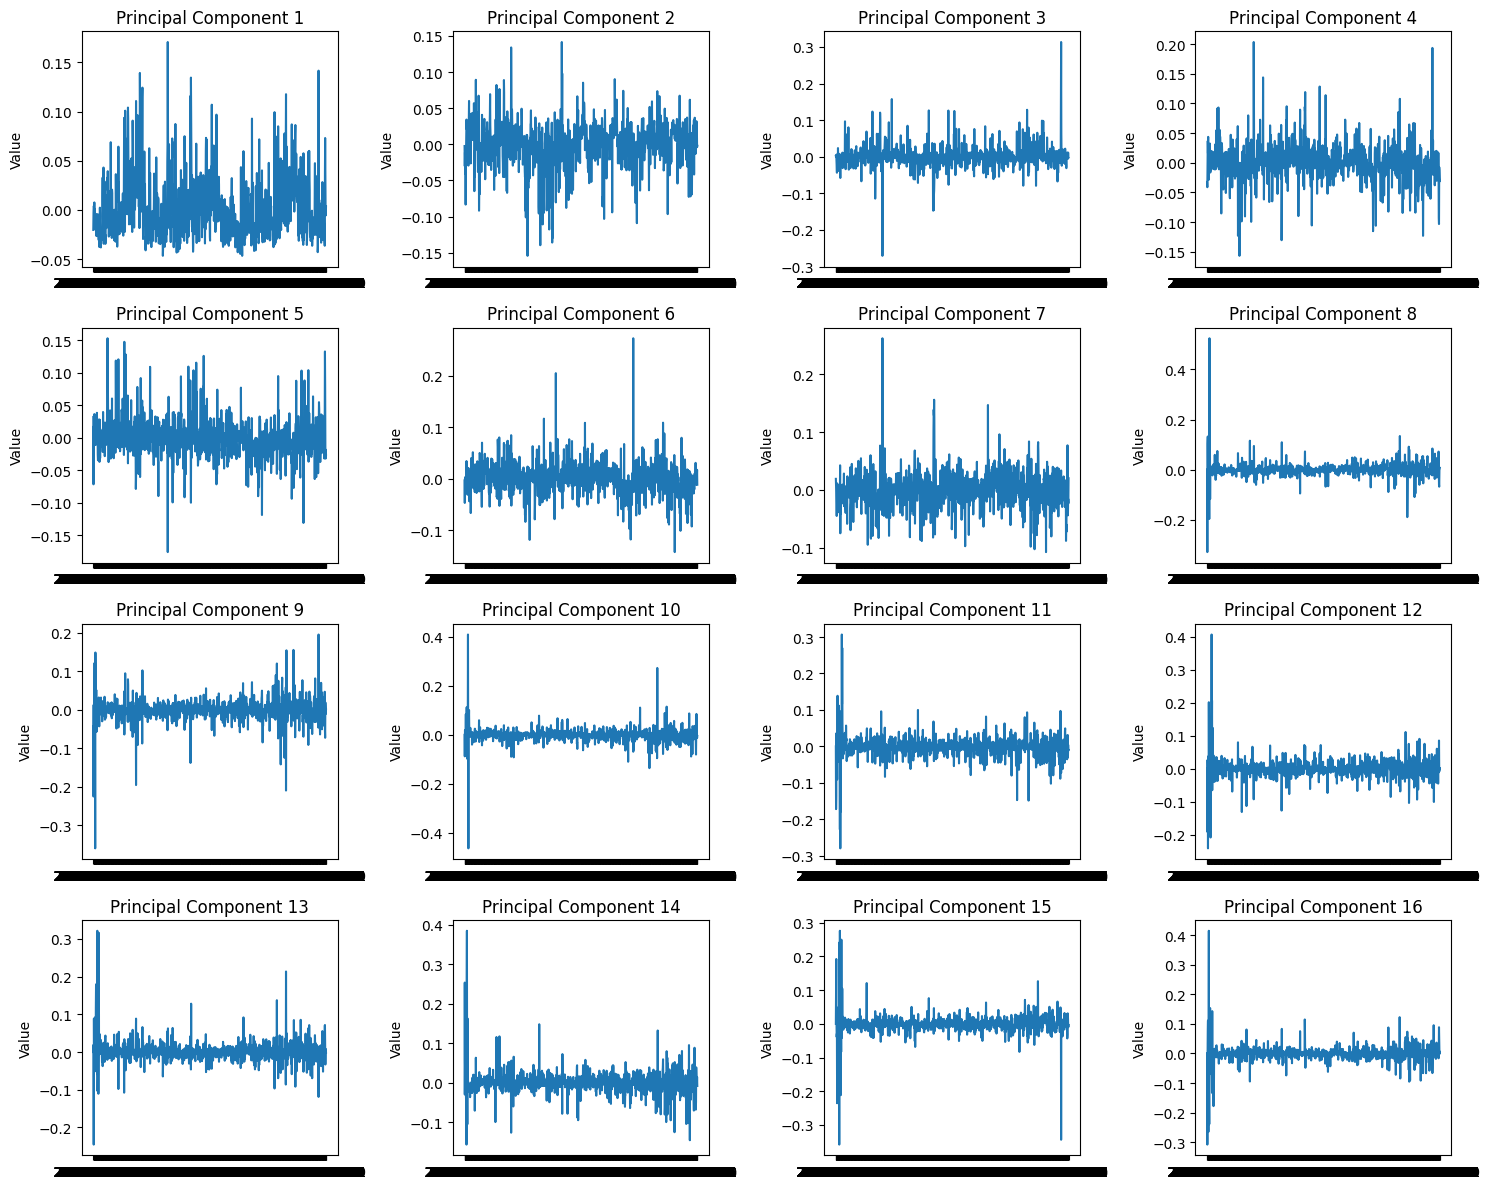

In [270]:
##YOUR CODE HERE ### ~ Continued

#Part 2.5: Plot first 16 Principal Components as time series
print(eigenVectors.shape)
pc_count = 16
dates = data_standardized.index

fig, axes = plt.subplots(4, 4, figsize=(15, 12))
axes = axes.flatten()

for i in range(pc_count):
  axes[i].plot(data_raw.columns, eigenVectors[:, i])
  axes[i].set_title(f'Principal Component {i+1}')
  axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()

# Part 2.6: Answered in markdown cell below

**Part 2.6:** Compare first few PCs with others and note the trends.

In the first 4 PCs there appears to be alot of variance however in the subsequent ones there is little to none. It appears that the first few PCs are more impactful on the data.


# Part 3: Data reconstruction [21 Marks]

Create a function that:

*   Accepts a destination state and the original dataset as inputs.
*   Calls useful functions that you designed in previous parts to compute eigenvectors and eigenvalues.
*   Plots 4 figures:
  1.   The original time-series for the specified state. **[5]**
  2.   The incremental reconstruction of the **original** (not standardized) time-series for the specified state in a single plot. **[8]**
       * You should show 4 curves in a figure for incremental reconstruction by picking the following combinations:
          * Reconstruction with only PC1
          * Reconstruction with both PC1 and PC2
          * Reconstruction with PC1 to PC4 (First 4 PCs)
          * Reconstruction with PC1 to PC6 (First 6 PCs)

      * Hint: you need to compute the reconstruction for the standardized time-series first, and then scale it back to the original (non-standardized form) using the StandardScaler `inverse_transform` [help...](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)
  3.   The residual error for your best reconstruction with respect to the original time-series. **[3]**
      * Hint: You are plotting the error that we have for reconstructing each day `(df - df_reconstructed)`. On the x-axis, you have dates, and on the y-axis, the residual error.
  4.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). Sweep x-axis from 1 to 7 (this part is independent from part 3.2.) **[3]**

Test your function using the `AZ`, `CA`, `IL` and `NC` as inputs. **[2]**


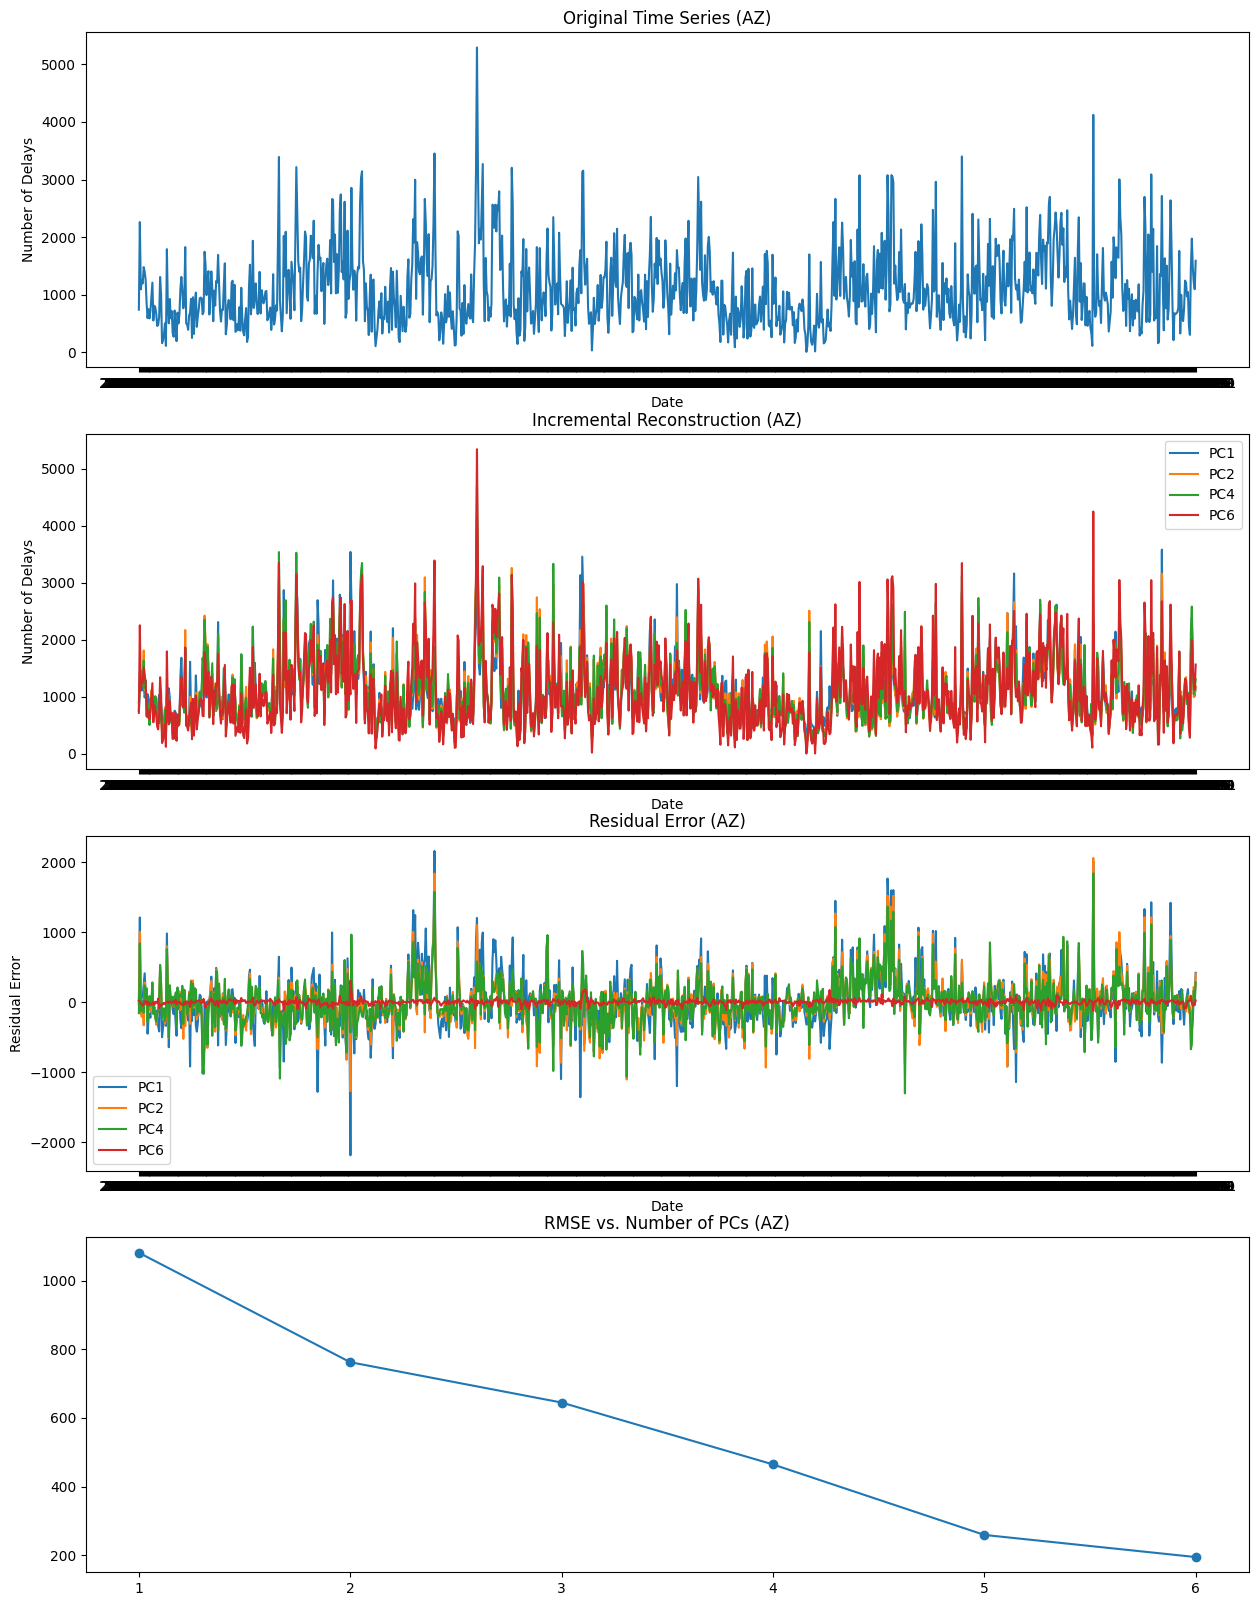

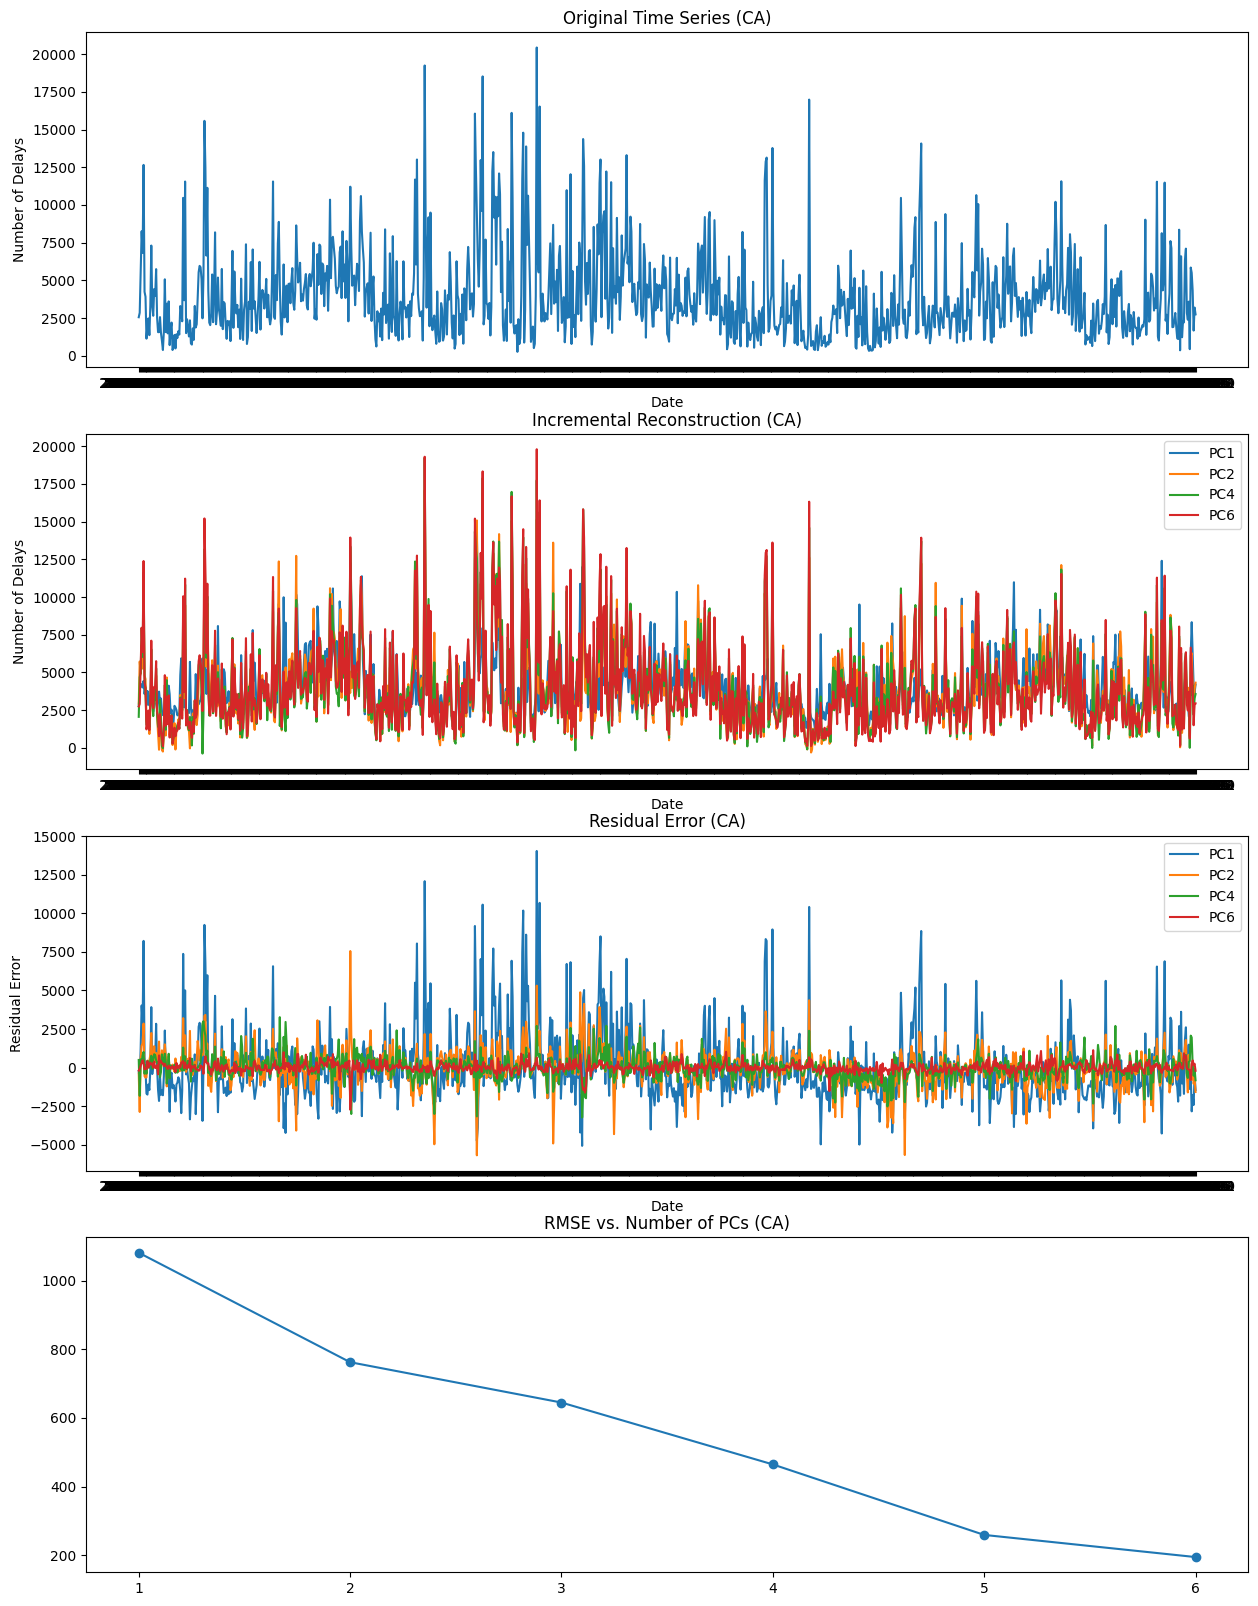

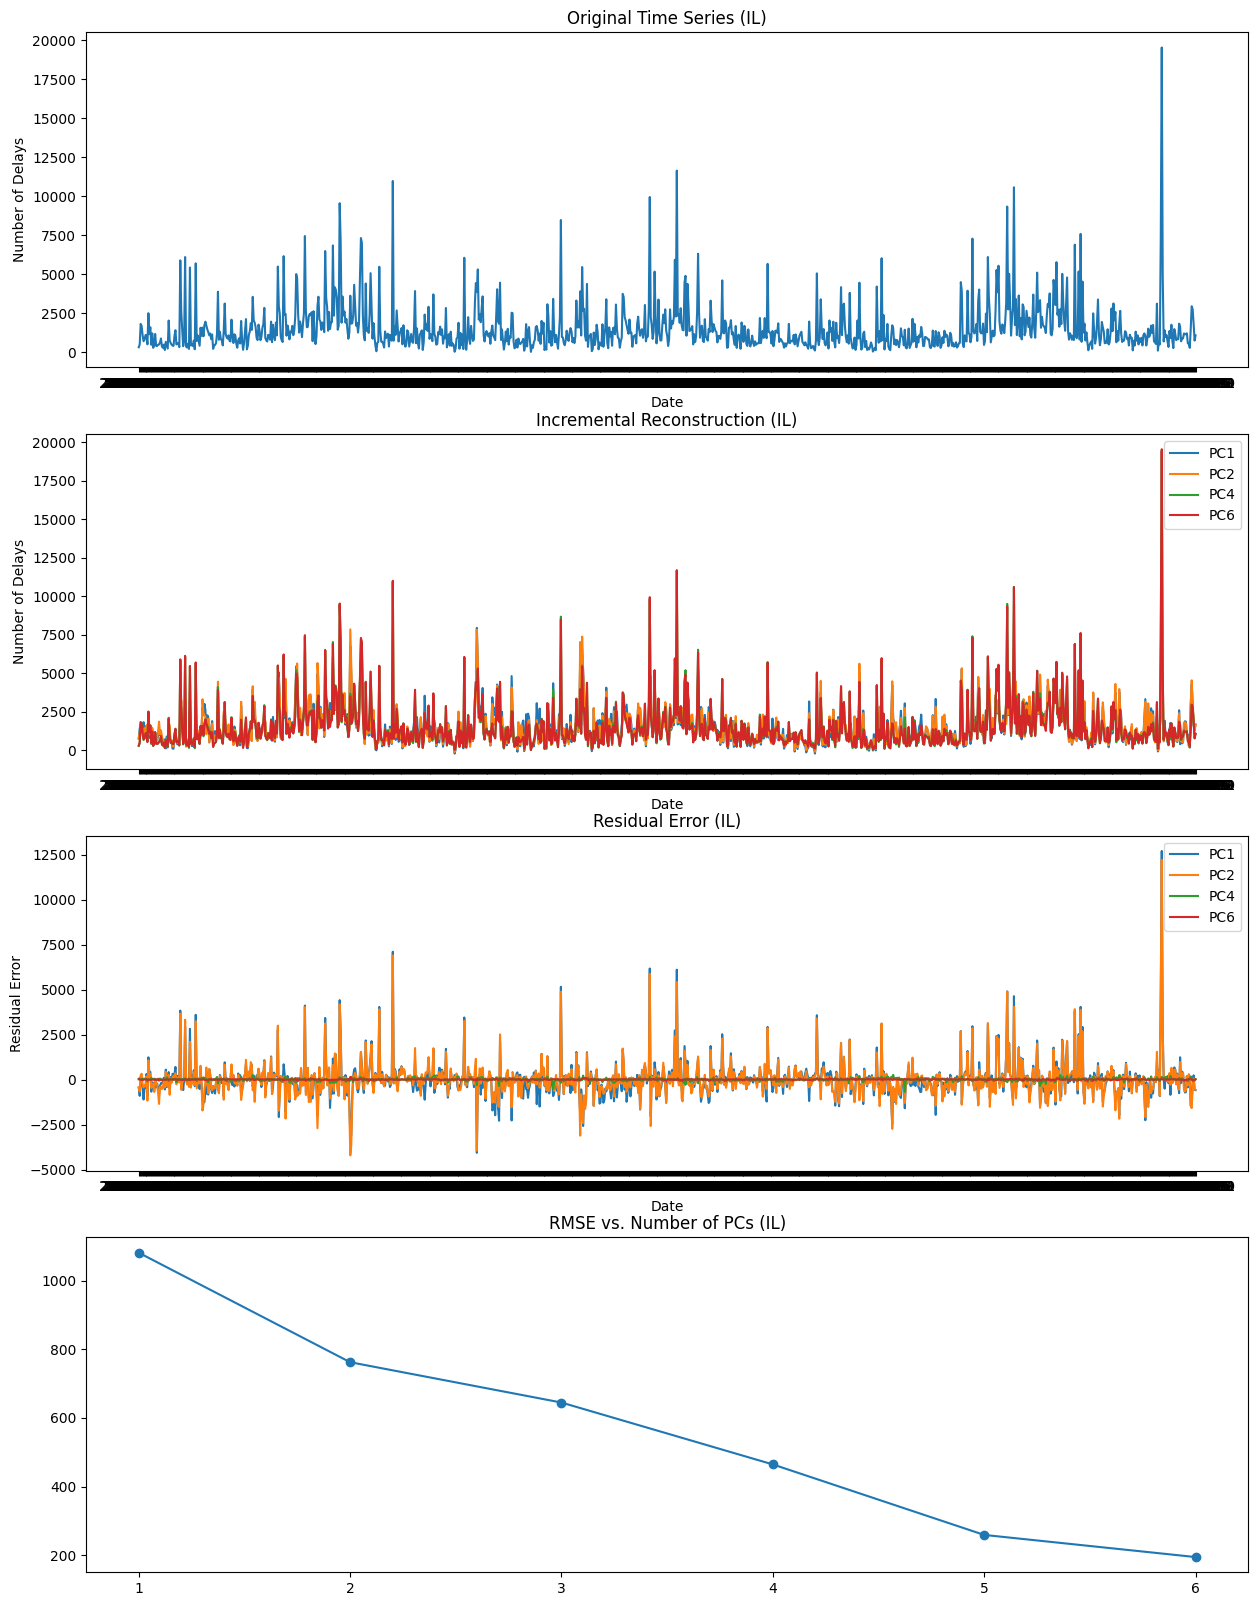

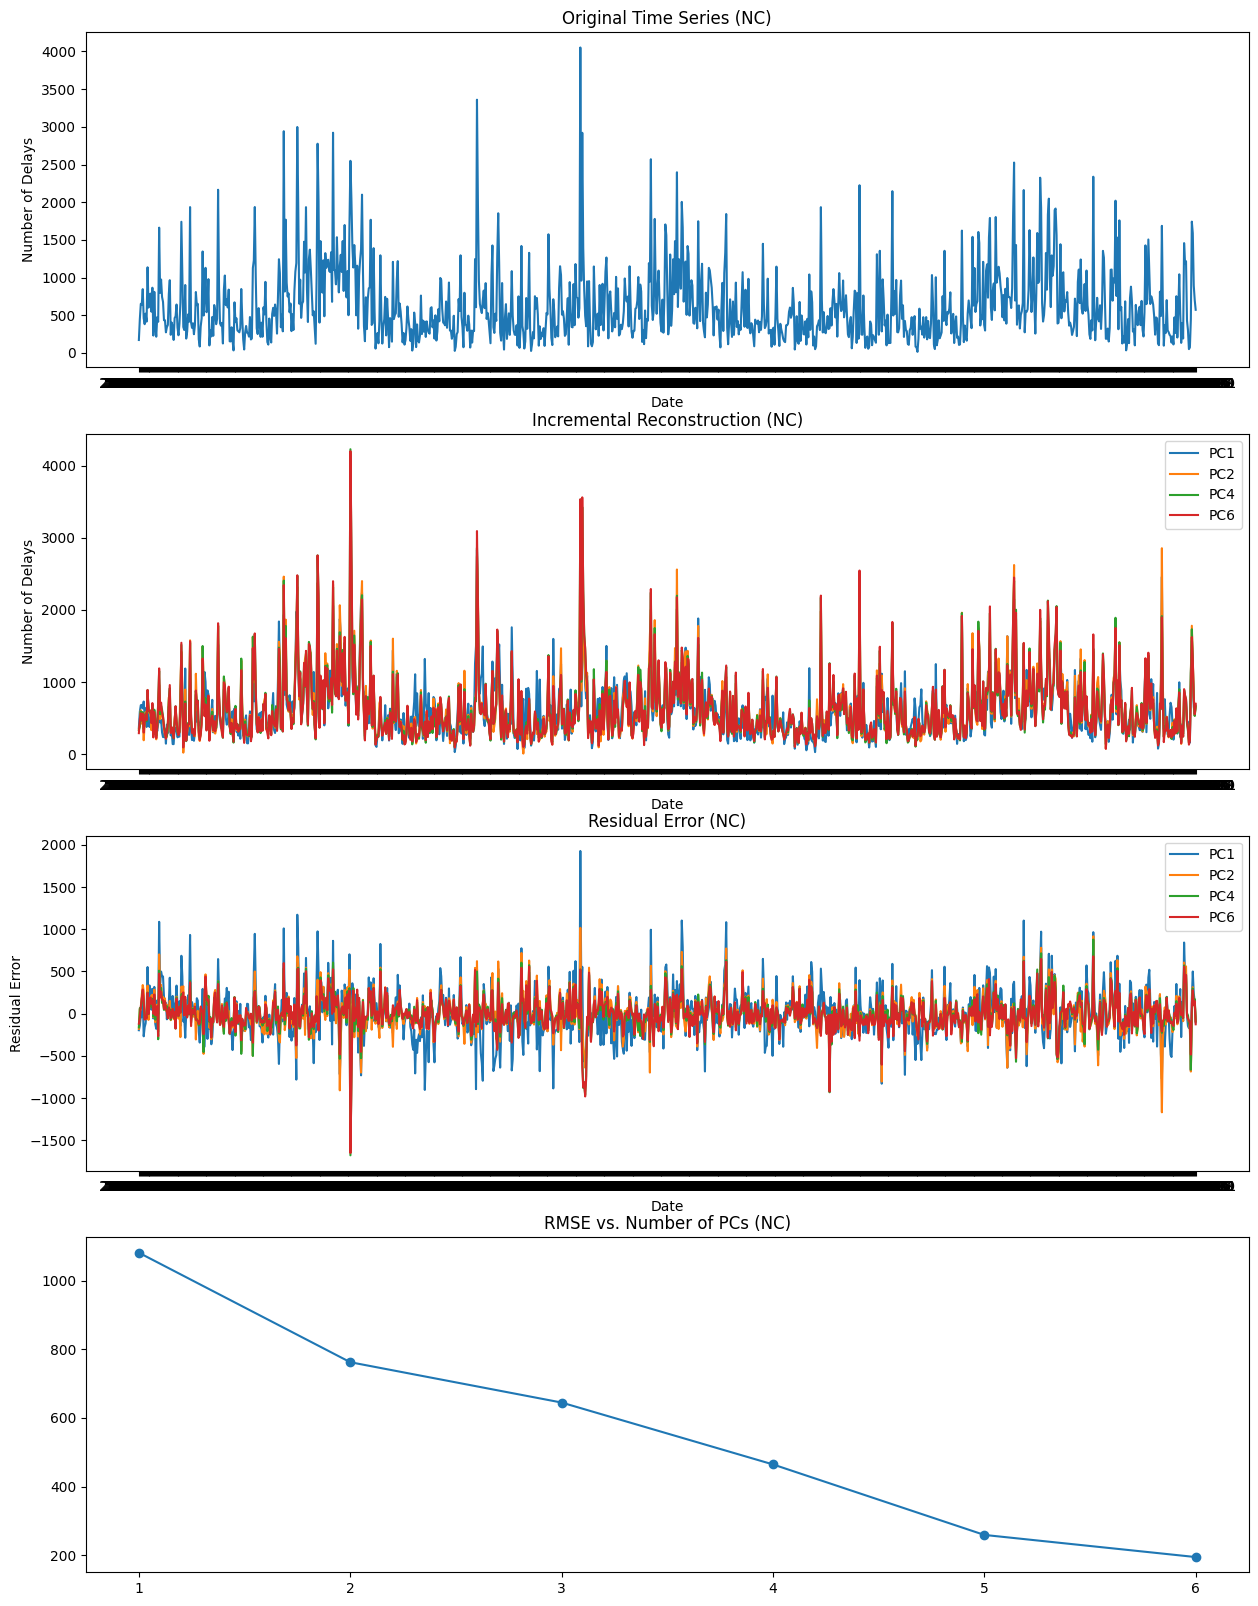

In [271]:
### YOUR CODE HERE ###

def plot_for_state(state, data):
    df = data.copy()
    df = df.T
    df = pd.DataFrame(df.values, index=data.columns, columns=data.index)

    #Part 3.0: Form Axes for Subplots
    fig, axes = plt.subplots(4, 1, figsize=(15, 20))
    axes = axes.flatten()

    #Part 3.1: Original Time Series Plot
    axes[0].plot(df.index, df[state])
    axes[0].set_title(f"Original Time Series ({state})")
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Number of Delays')

    #Part 3.2: Reconstruction Plots

    #Scaling & Eigen Vectors
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(df_scaled, index=df.index, columns=df.columns)
    n, m = df_scaled.shape
    cov = np.dot(df_scaled.T.values, df_scaled.values) / (n - 1)
    eigenValues, eigenVectors = get_sorted_eigen(cov)
    #print(df_scaled.shape, eigenVectors.shape, cov.shape)

    pcs = [1, 2, 4, 6]

    #Projection
    projection = np.dot(df_scaled.values, eigenVectors)

    #Reconstruction
    for a in pcs:
      reconstructed = np.dot(projection[:, :a], eigenVectors[:, :a].T)
      #Scale back to normal
      reconstructed = scaler.inverse_transform(reconstructed)
      reconstructed = pd.DataFrame(reconstructed, index=df.index, columns=df.columns)
      axes[1].plot(reconstructed.index, reconstructed[state], label=f'PC{a}')
      axes[1].set_title(f"Incremental Reconstruction ({state})")
      axes[1].set_xlabel('Date')
      axes[1].set_ylabel('Number of Delays')
      axes[1].legend()
      axes[1].grid()
      axes[1].legend()

      #Residual Error
      residual_error = df - reconstructed
      axes[2].plot(residual_error.index, residual_error[state], label=f'PC{a}')
      axes[2].set_title(f"Residual Error ({state})")
      axes[2].set_xlabel('Date')
      axes[2].set_ylabel('Residual Error')
      axes[2].grid()
      axes[2].legend()

    RMSE_vals = []
    rmse_pcs = [1, 2, 3, 4, 5, 6]
    for b in rmse_pcs:
      reconstructed = np.dot(projection[:, :b], eigenVectors[:, :b].T)
      #Scale back to normal
      reconstructed = scaler.inverse_transform(reconstructed)
      reconstructed = pd.DataFrame(reconstructed, index=df.index, columns=df.columns)
      rmse = np.sqrt(np.mean((df - reconstructed)**2))
      RMSE_vals.append(rmse)

    axes[3].plot(rmse_pcs, RMSE_vals, marker='o')
    axes[3].set_title(f"RMSE vs. Number of PCs ({state})")


def state_plot_test(state_list, raw_data):
    for state in state_list:
        plot_for_state(state, raw_data)
        plt.show()

state_list = ['AZ', 'CA', 'IL', 'NC']
state_plot_test(state_list, data_raw)


# Part 4: SVD [14 Marks]
Modify your code in part 3 to use SVD instead of PCA. **[8]**

Explain if standardization or covariance computation is required for this part.
Repeat part 3 and compare your PCA and SVD results. For comparison, you should overlay the best reconstruction from PCA with the reconstruction using SVD, same for residual error and RMSE of reconstruction. Write a function to make this comparison **[3]**, and comment on the results. **[3]**.

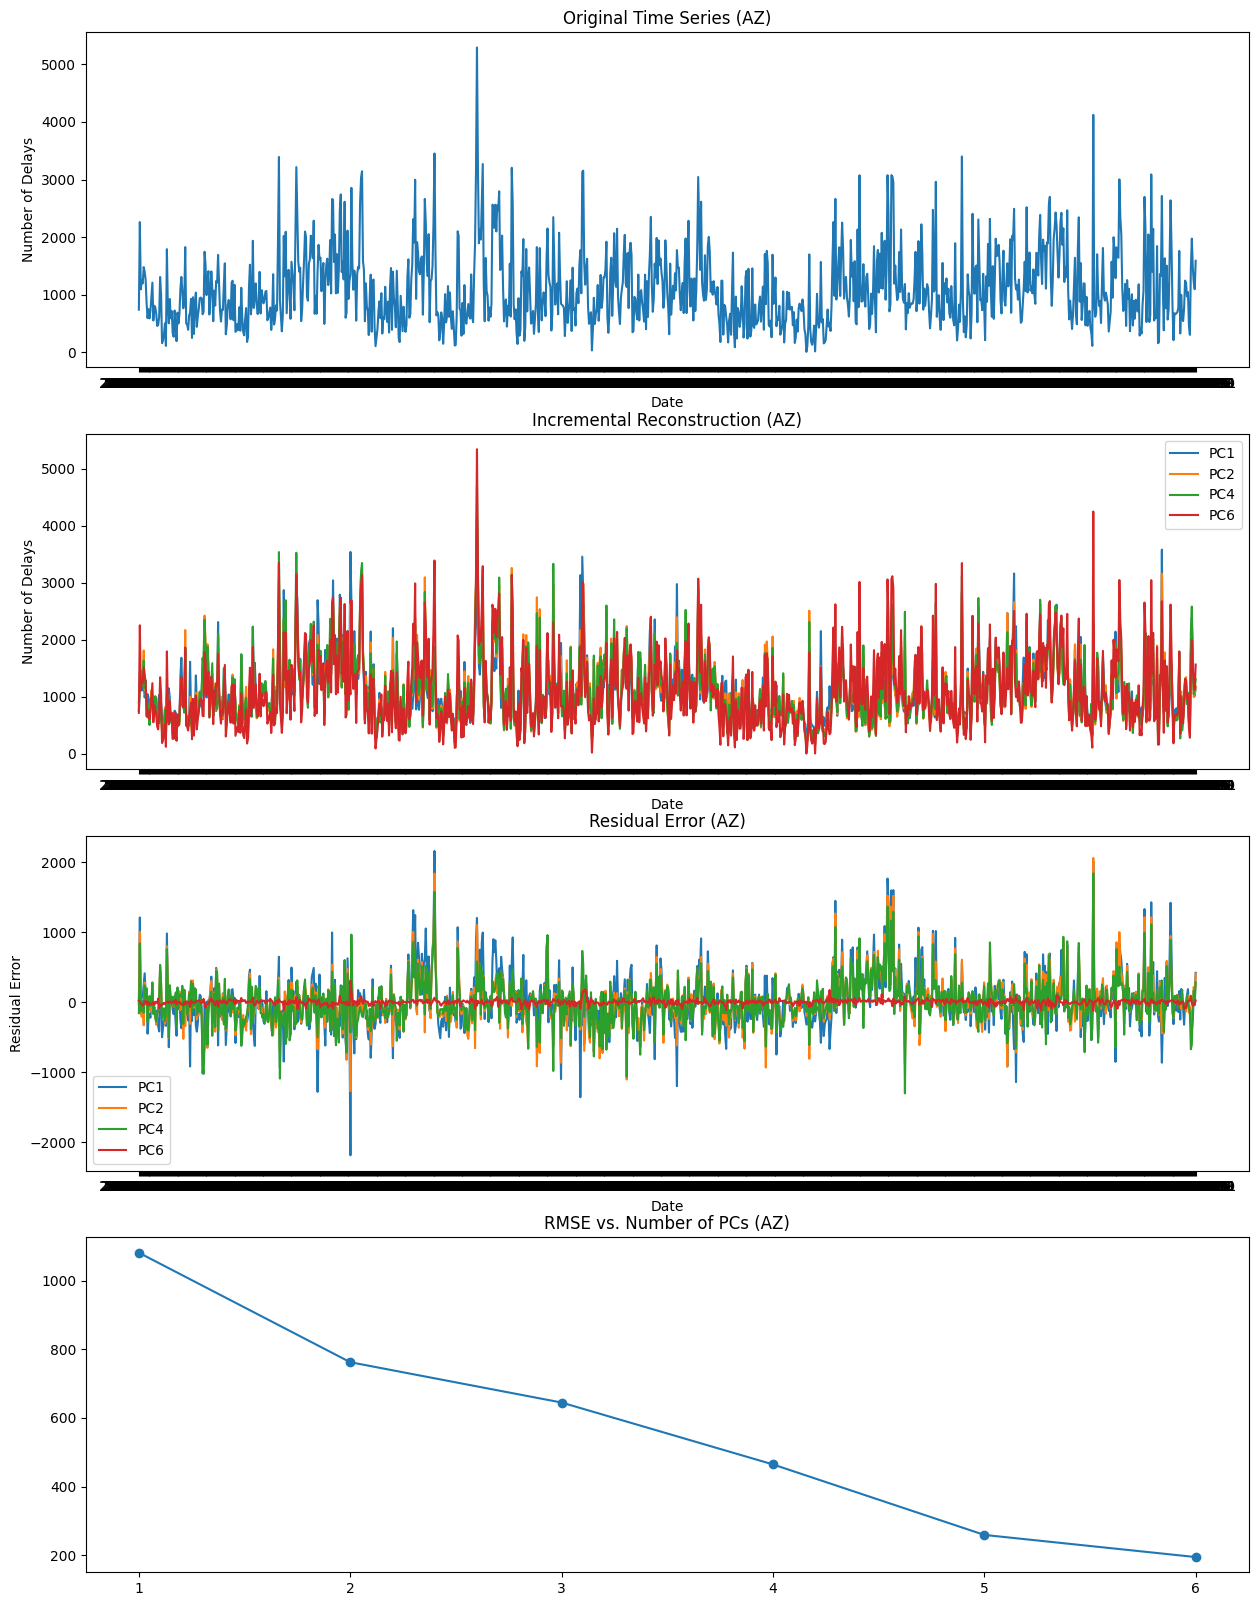

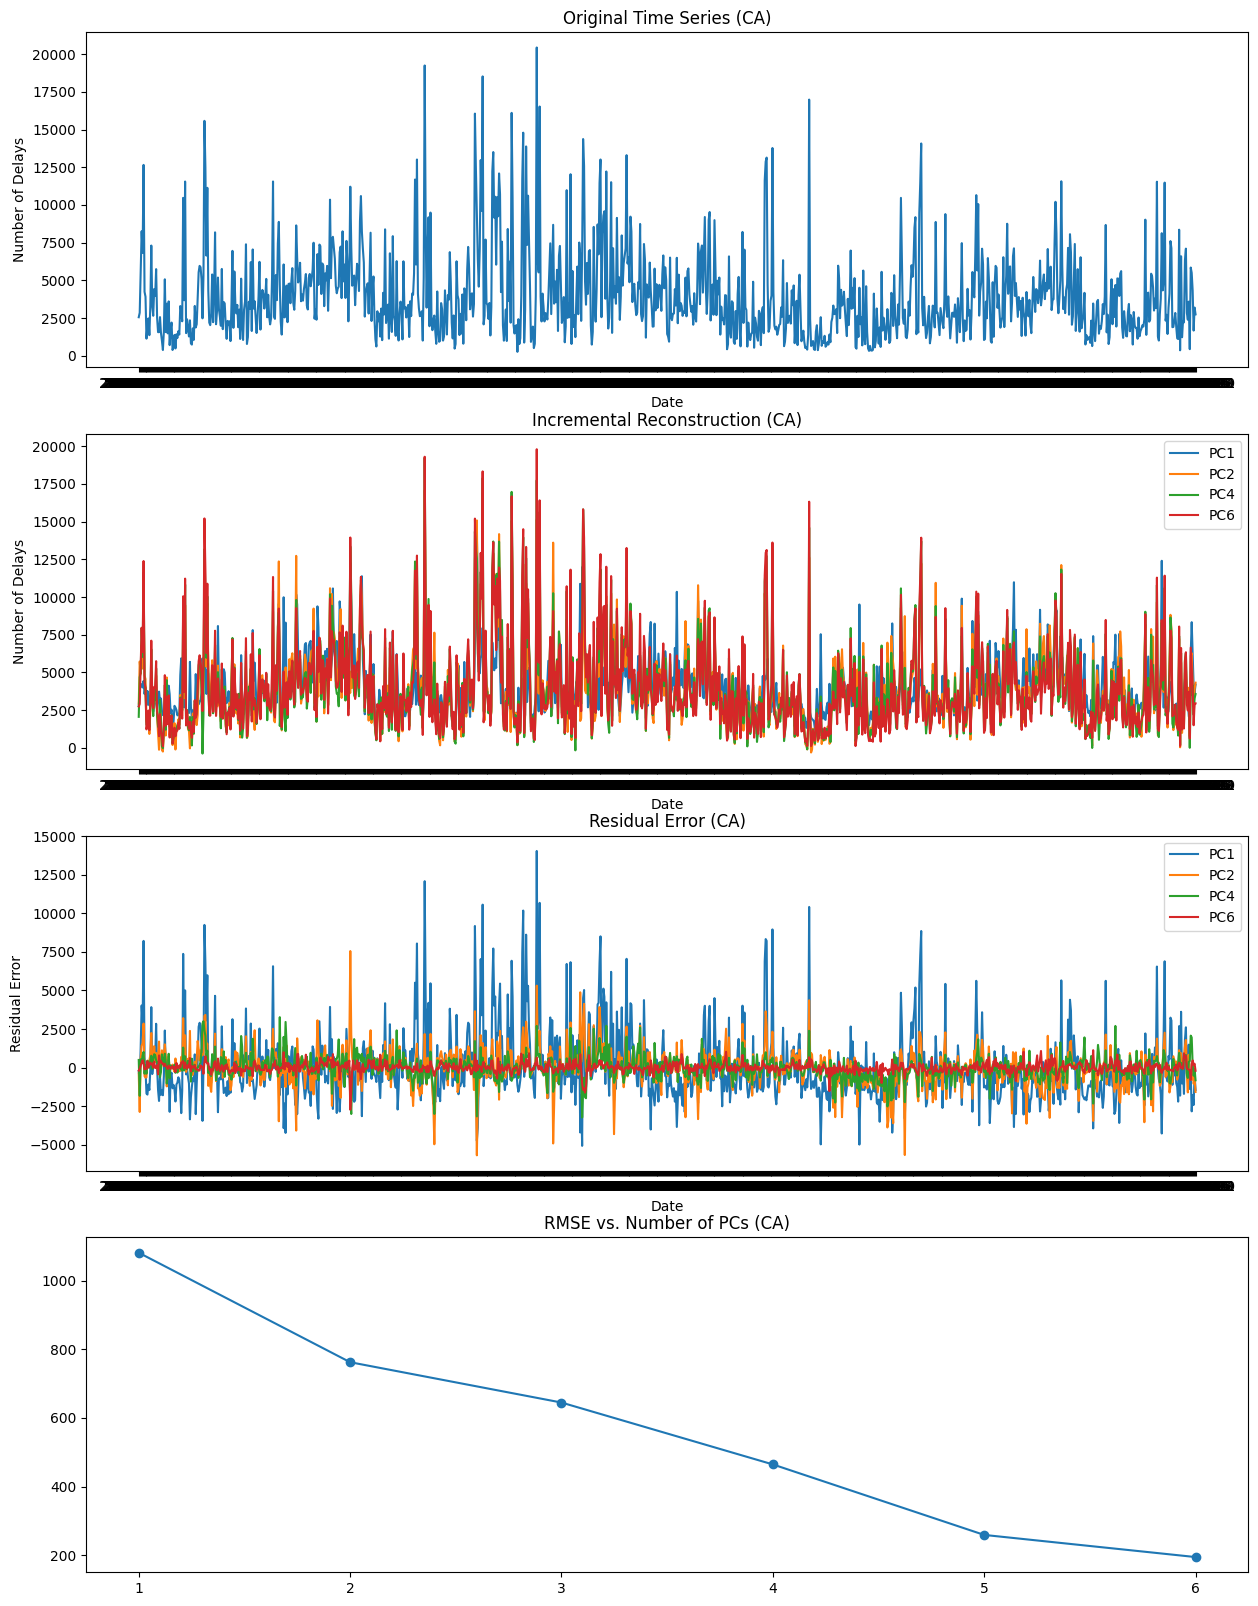

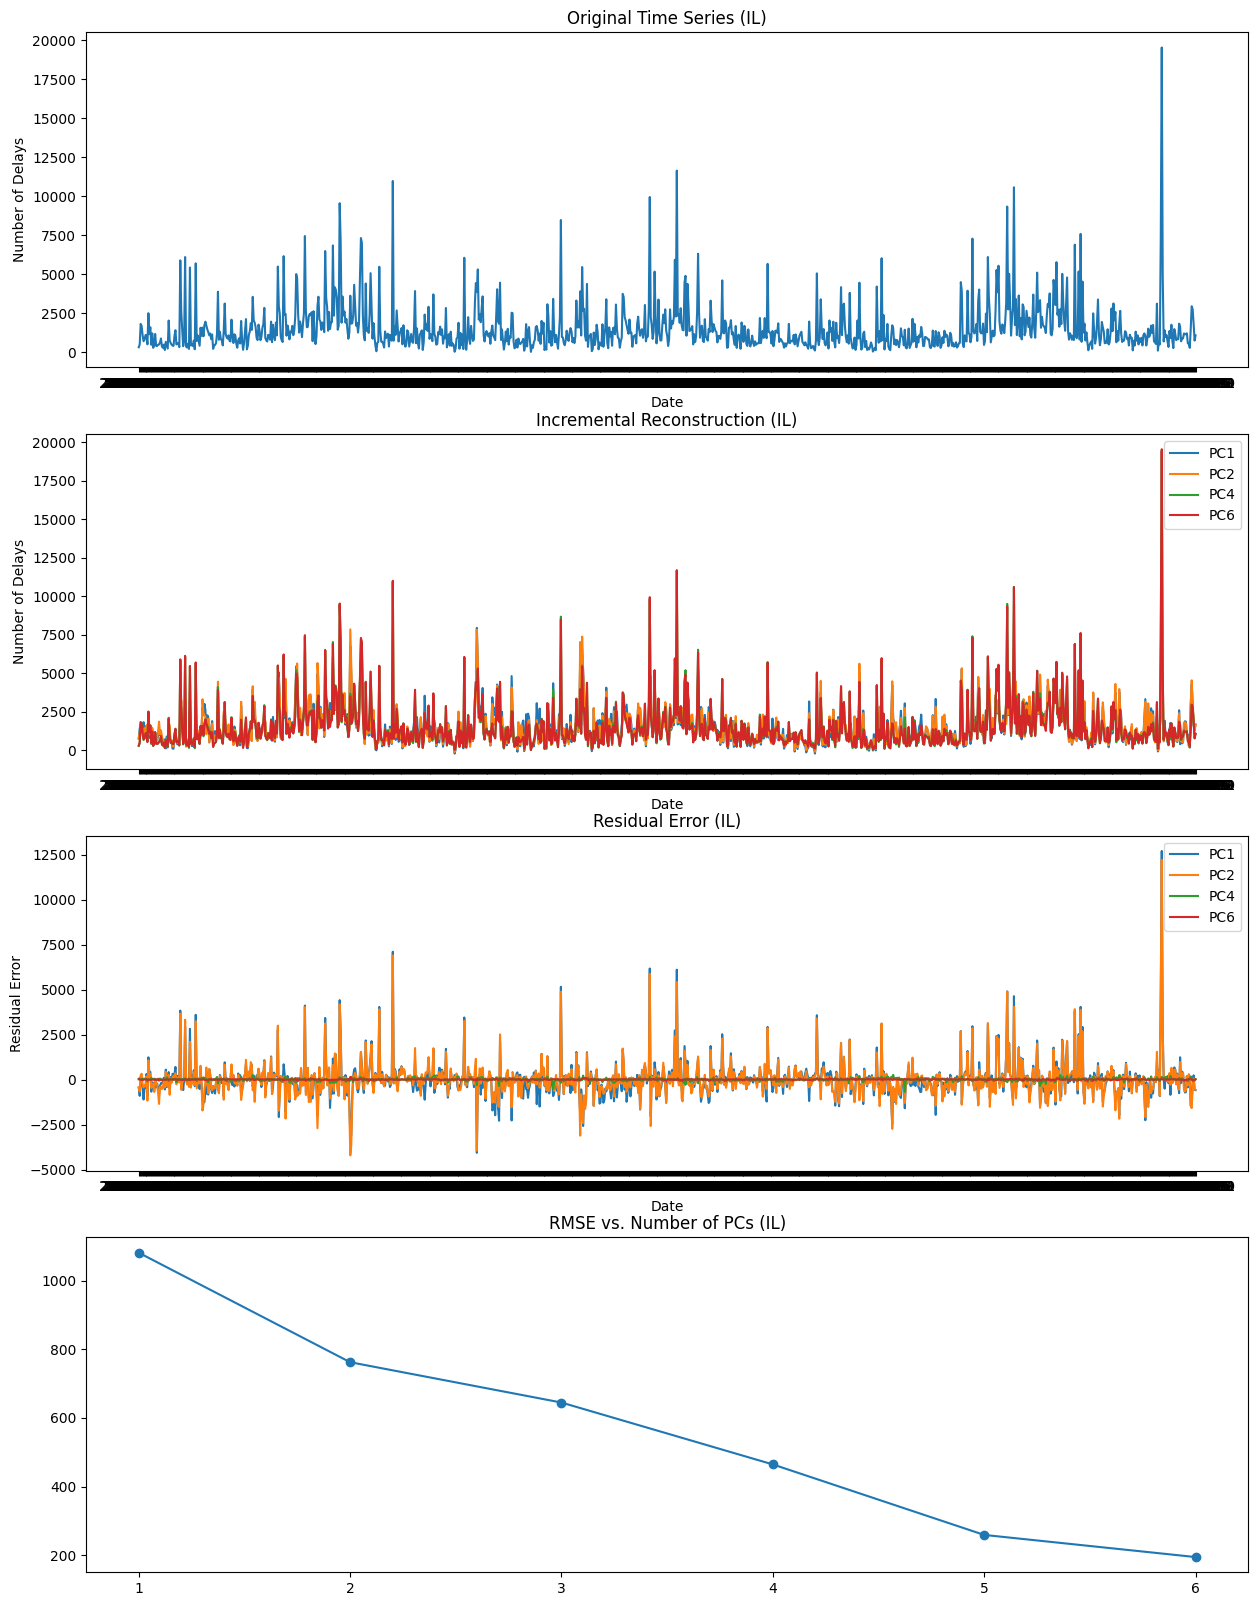

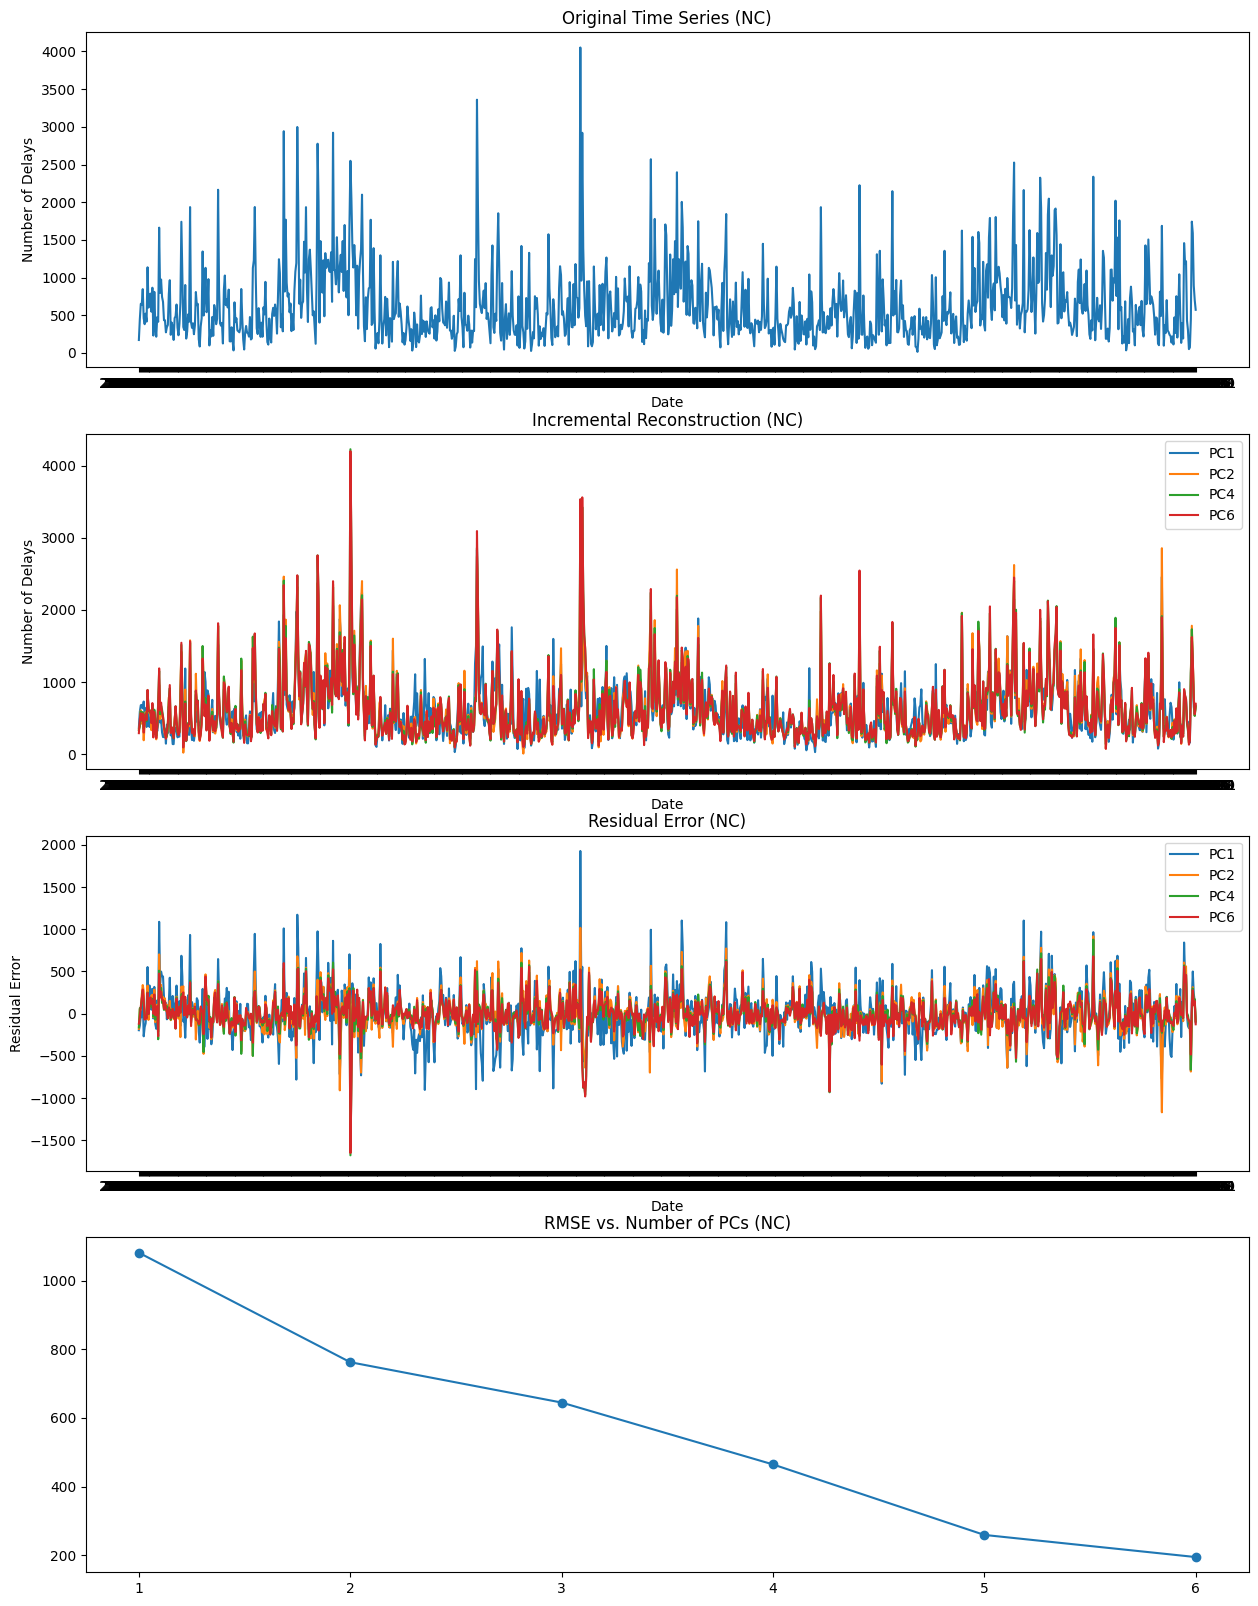

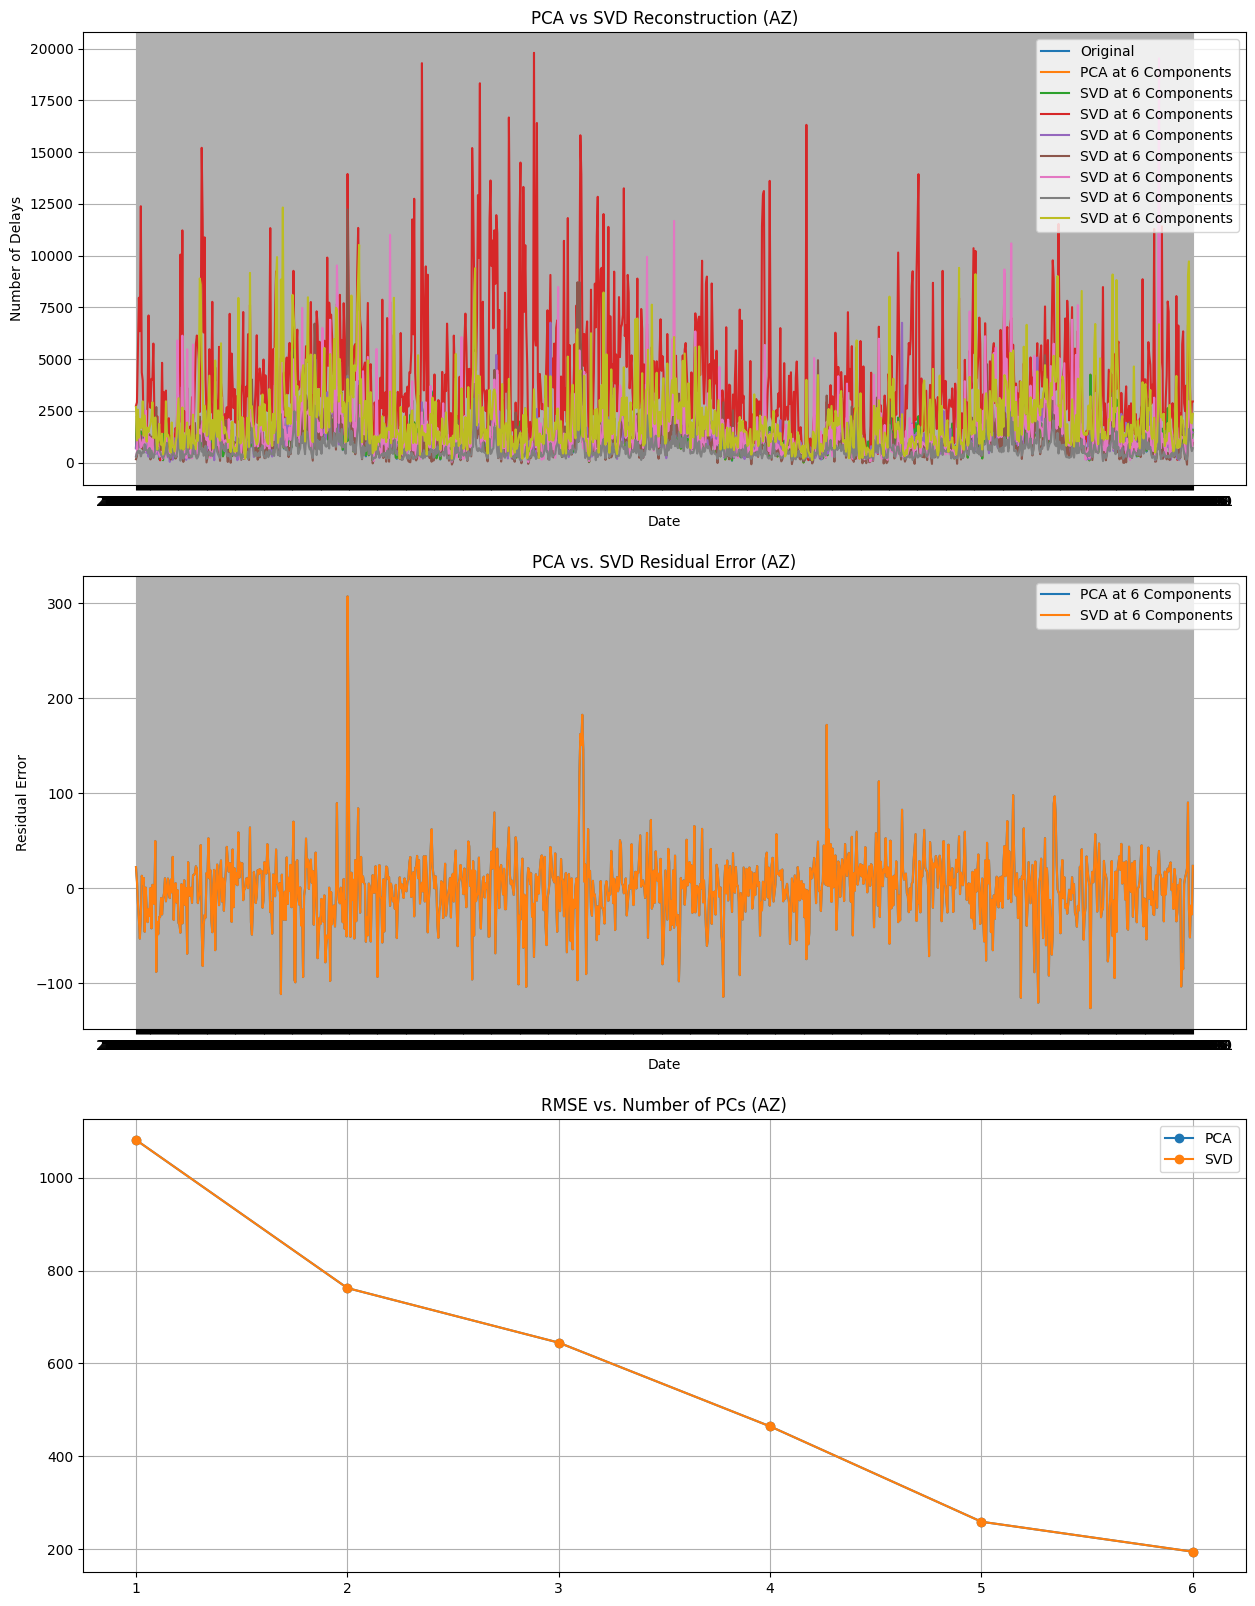

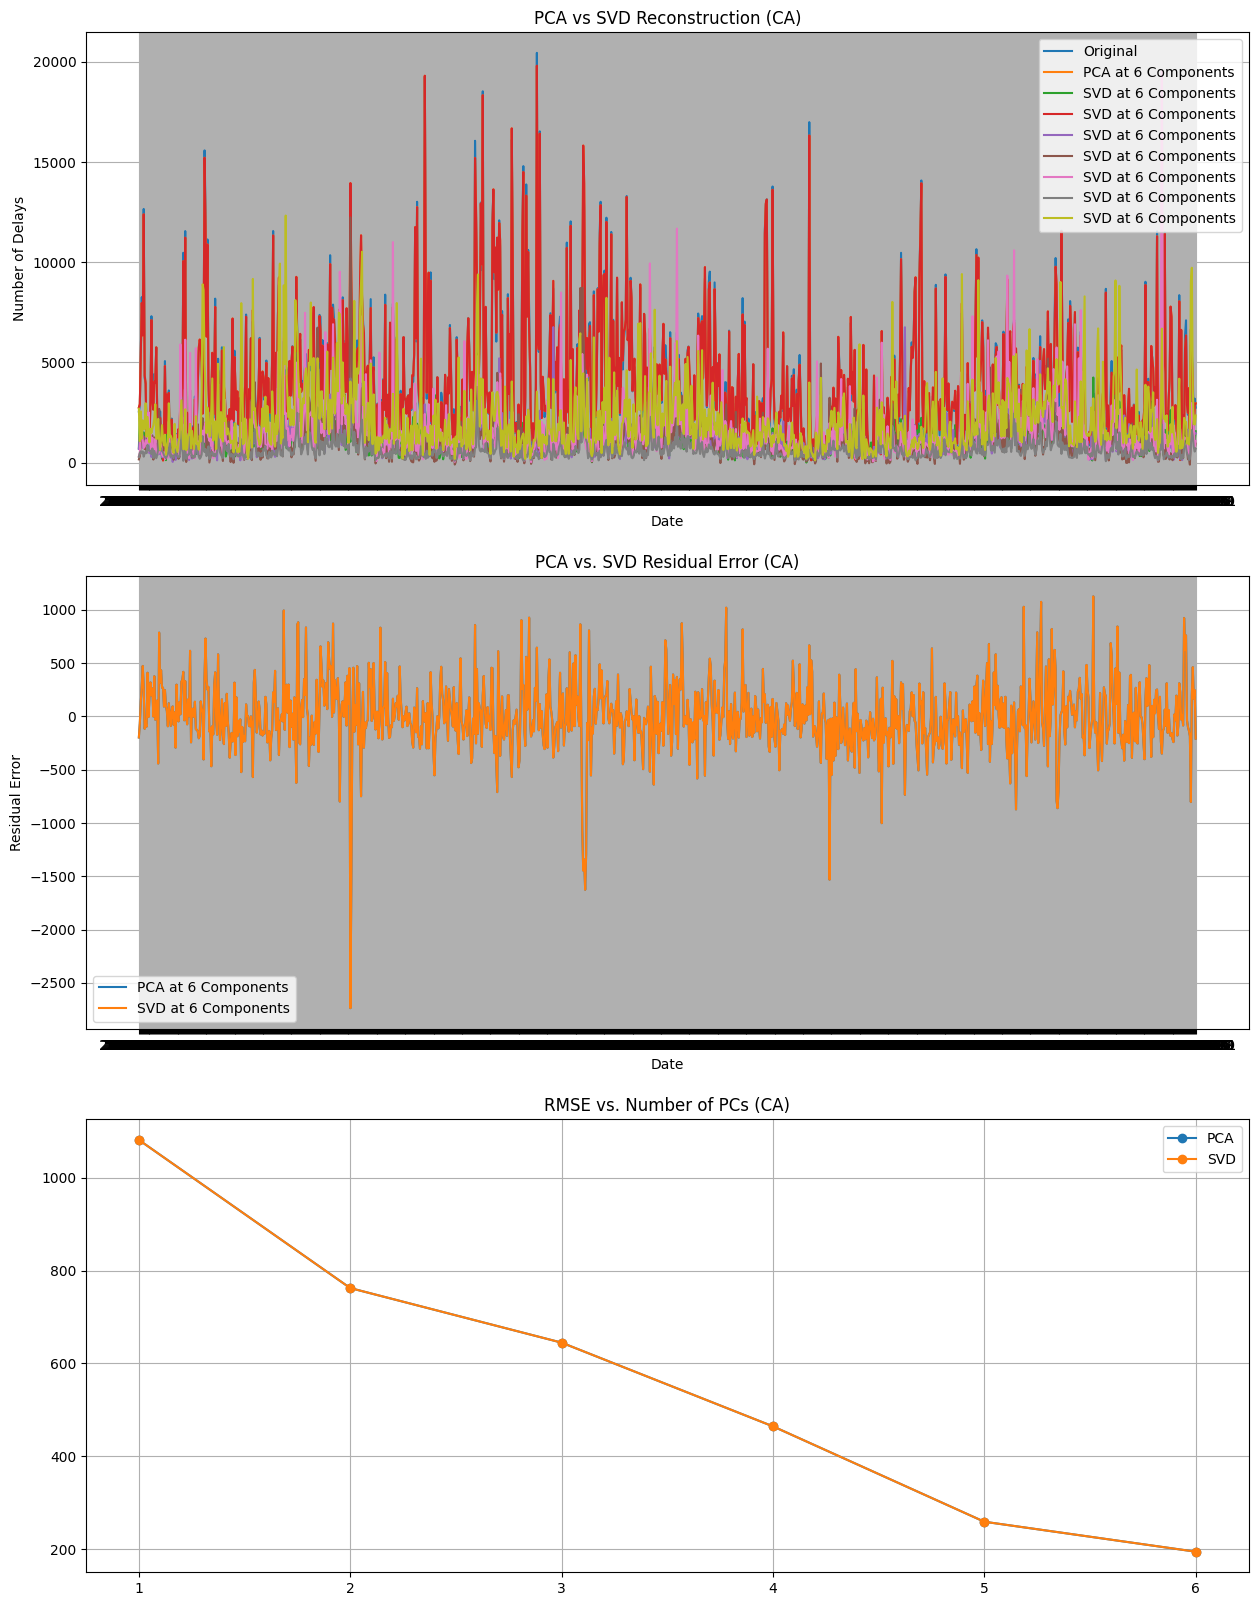

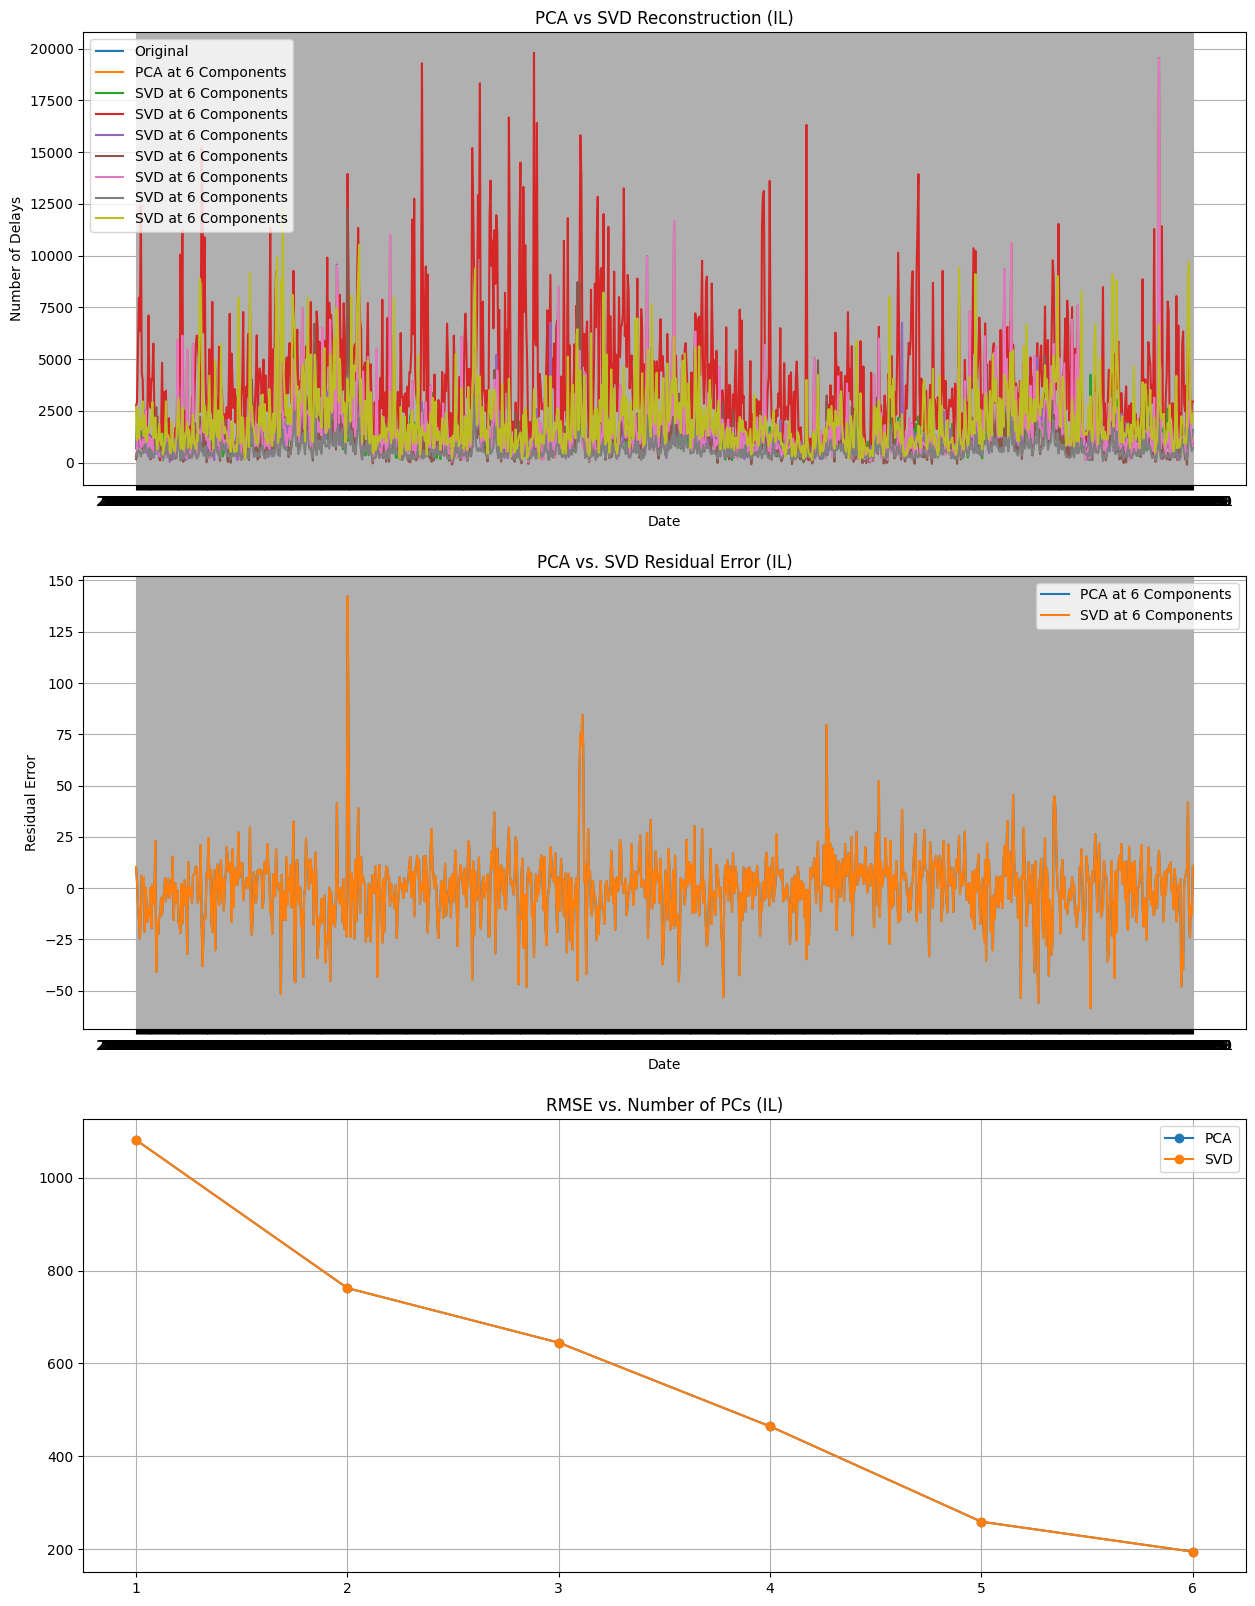

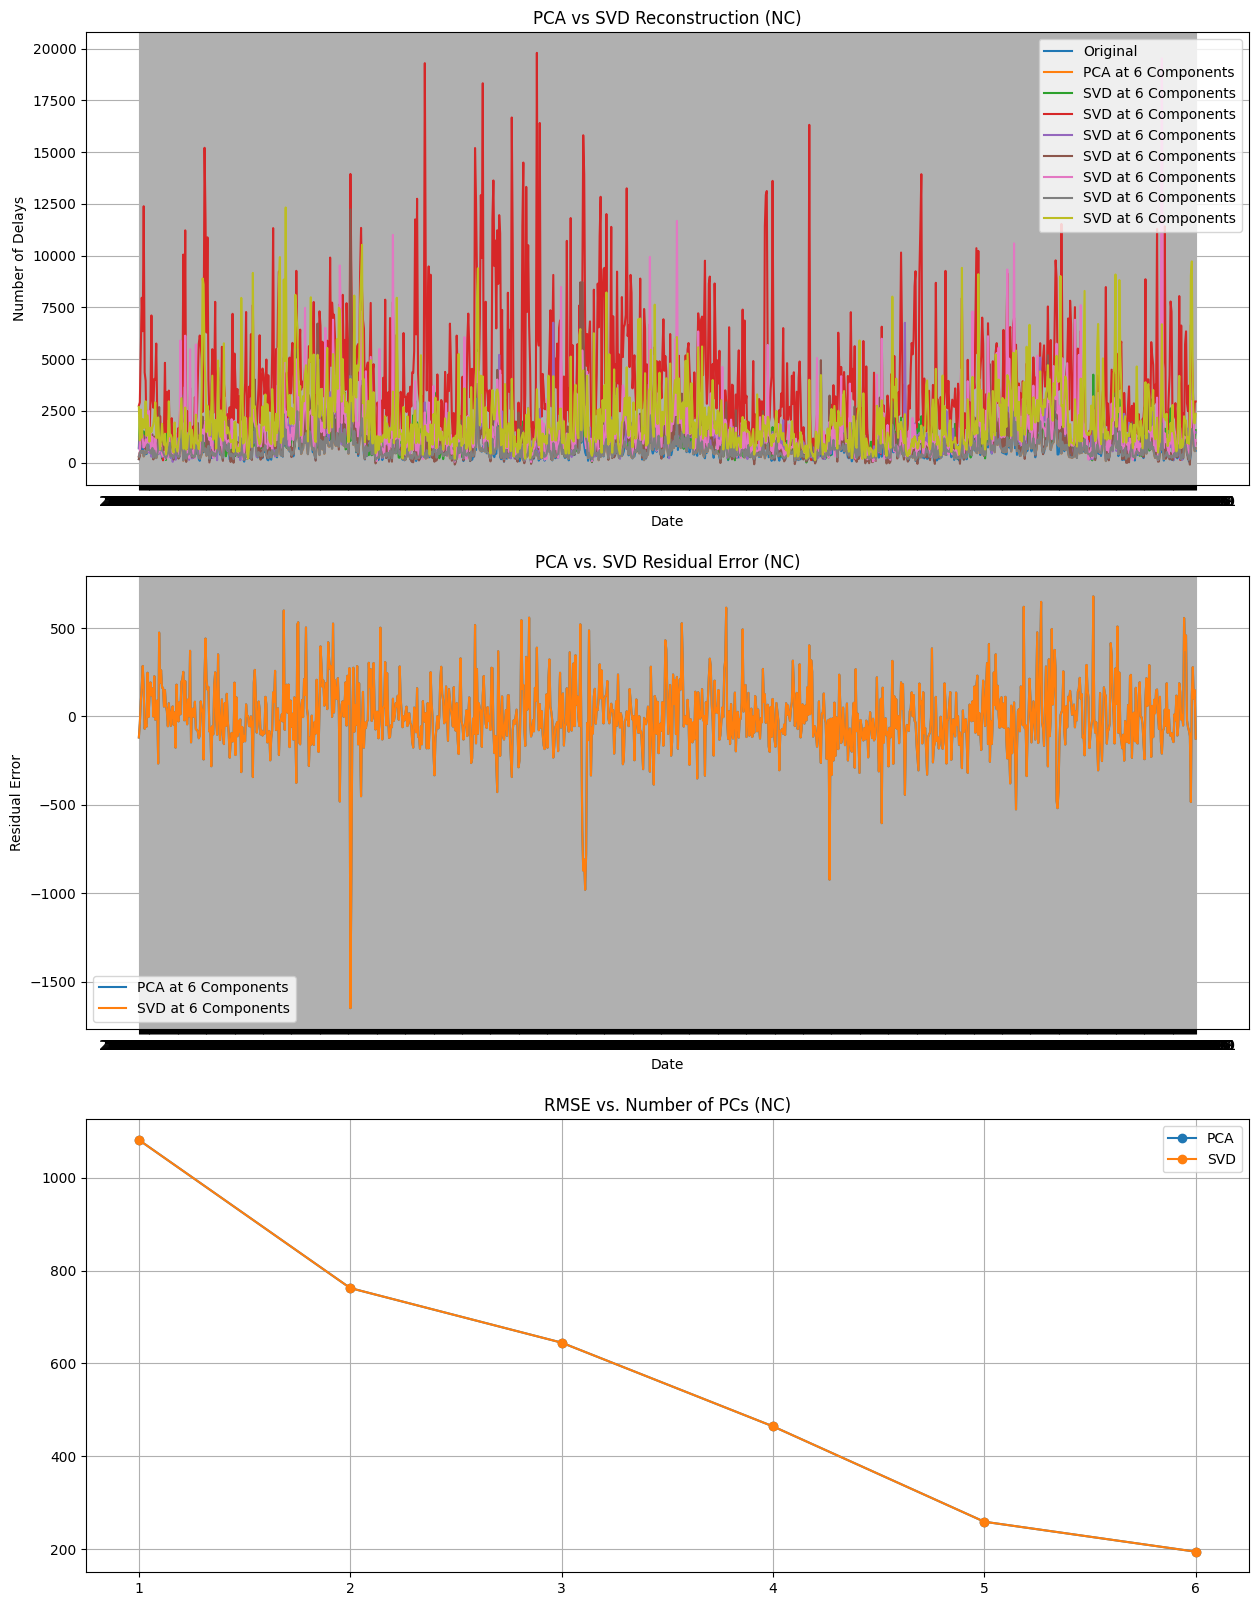

In [273]:
### YOUR CODE HERE ###
def plot_for_state_svd(state, data):
    df = data.copy()
    df = df.T
    df = pd.DataFrame(df.values, index=data.columns, columns=data.index)
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(df_scaled, index=df.index, columns=df.columns)

    #Step 1: Make SVD
    U, S, VT = np.linalg.svd(df_scaled, full_matrices=False)

    fig, axes = plt.subplots(4, 1, figsize=(15, 20))
    axes = axes.flatten()

    #Step 2: Original Time Series Plot
    axes[0].plot(df.index, df[state])
    axes[0].set_title(f"Original Time Series ({state})")
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Number of Delays')

    #Step 3: Reconstruction
    pcs = [1, 2, 4, 6]
    for a in pcs:
      reconstructed = np.dot(np.dot(U[:, :a], np.diag(S[:a])), VT[:a, :])
      #Scale back to normal
      reconstructed = scaler.inverse_transform(reconstructed)
      reconstructed = pd.DataFrame(reconstructed, index=df.index, columns=df.columns)
      axes[1].plot(reconstructed.index, reconstructed[state], label=f'PC{a}')
      axes[1].set_title(f"Incremental Reconstruction ({state})")
      axes[1].set_xlabel('Date')
      axes[1].set_ylabel('Number of Delays')
      axes[1].legend()
      axes[1].grid()
      axes[1].legend()

      #Residual Error
      residual_error = df - reconstructed
      axes[2].plot(residual_error.index, residual_error[state], label=f'PC{a}')
      axes[2].set_title(f"Residual Error ({state})")
      axes[2].set_xlabel('Date')
      axes[2].set_ylabel('Residual Error')
      axes[2].grid()
      axes[2].legend()

    RMSE_vals = []
    rmse_pcs = [1, 2, 3, 4, 5, 6]
    for b in rmse_pcs:
      reconstructed = np.dot(np.dot(U[:, :b], np.diag(S[:b])), VT[:b, :])
      #Scale back to normal
      reconstructed = scaler.inverse_transform(reconstructed)
      reconstructed = pd.DataFrame(reconstructed, index=df.index, columns=df.columns)
      rmse = np.sqrt(np.mean((df - reconstructed)**2))
      RMSE_vals.append(rmse)

    axes[3].plot(rmse_pcs, RMSE_vals, marker='o')
    axes[3].set_title(f"RMSE vs. Number of PCs ({state})")

def compare_svd_pca(state, data):
    #Setup values
    df = data.copy()
    df = df.T
    df = pd.DataFrame(df.values, index=data.columns, columns=data.index)

    #Scale data
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(df_scaled, index=df.index, columns=df.columns)

    #Set up PCA
    n, m = df_scaled.shape
    cov = np.dot(df_scaled.T.values, df_scaled.values) / (n - 1)
    eigenValues, eigenVectors = get_sorted_eigen(cov)

    #Set up SVD
    U, S, VT = np.linalg.svd(df_scaled, full_matrices=False)

    #Compare
    fig, axes = plt.subplots(3, 1, figsize=(15, 20))
    axes = axes.flatten()

    best_pca_reconstructed = float('inf')

    projection = np.dot(df_scaled.values, eigenVectors)

    best_reconstructed_df = pd.DataFrame()

    recon_num = 0

    rmse_pcs = [1, 2, 3, 4, 5, 6]
    RMSE_vals_pca = []
    for b in rmse_pcs:
      reconstructed = np.dot(projection[:, :b], eigenVectors[:, :b].T)
      #Scale back to normal
      reconstructed = scaler.inverse_transform(reconstructed)
      reconstructed = pd.DataFrame(reconstructed, index=df.index, columns=df.columns)
      rmse = np.sqrt(np.mean((df - reconstructed)**2))
      RMSE_vals_pca.append(rmse)
      if rmse < best_pca_reconstructed:
        best_pca_reconstructed = rmse
        best_reconstructed_df = reconstructed
        recon_num = b


    reconstructed_svd = np.dot(np.dot(U[:, :recon_num], np.diag(S[:recon_num])), VT[:recon_num, :])
    reconstructed_svd = scaler.inverse_transform(reconstructed_svd)
    reconstructed_svd = pd.DataFrame(reconstructed_svd, index=df.index, columns=df.columns)

    #Plot 1: PCA vs SVD Reconstruction
    axes[0].plot(df.index, df[state], label = 'Original')
    axes[0].plot(best_reconstructed_df.index, best_reconstructed_df[state], label = 'PCA at 6 Components')
    axes[0].plot(reconstructed_svd.index, reconstructed_svd, label = 'SVD at 6 Components')
    axes[0].set_title(f"PCA vs SVD Reconstruction ({state})")
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Number of Delays')
    axes[0].legend()
    axes[0].grid()

    #Plot 2: PCA vs SVD Residual
    axes[1].plot(best_reconstructed_df.index, df[state] - best_reconstructed_df[state], label = 'PCA at 6 Components')
    axes[1].plot(reconstructed_svd.index, df[state] - reconstructed_svd[state], label = 'SVD at 6 Components')
    axes[1].set_title(f"PCA vs. SVD Residual Error ({state})")
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Residual Error')
    axes[1].legend()
    axes[1].grid()

    #Plot 3: RMSE
    RMSE_vals_svd = []
    for b in rmse_pcs:
      reconstructed = np.dot(projection[:, :b], eigenVectors[:, :b].T)
      #Scale back to normal
      reconstructed = scaler.inverse_transform(reconstructed)
      reconstructed = pd.DataFrame(reconstructed, index=df.index, columns=df.columns)
      rmse = np.sqrt(np.mean((df - reconstructed)**2))
      RMSE_vals_svd.append(rmse)

    axes[2].plot(rmse_pcs, RMSE_vals_pca, marker='o', label = 'PCA')
    axes[2].plot(rmse_pcs, RMSE_vals_svd, marker='o', label = 'SVD')
    axes[2].set_title(f"RMSE vs. Number of PCs ({state})")
    axes[2].legend()
    axes[2].grid()

def state_plot_test_svd(state_list, raw_data):
    for state in state_list:
        plot_for_state_svd(state, raw_data)
        plt.show()

    for state in state_list:
        compare_svd_pca(state, raw_data)
        plt.show()

state_list = ['AZ', 'CA', 'IL', 'NC']
state_plot_test_svd(state_list, data_raw)

**Comment on Results. [3]**


# Part 5: Let's explore the flip side of PCA using another dataset! [42 Marks in Total]


In the previous parts, we explored PCA for data reconstruction, where we aimed to approximate the original dataset using a reduced number of principal components.

Now, we will pivot to *the other side of the coin*, we will be **using PCA for feature analysis** with the [wine quality](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset) dataset.

Instead of reconstructing the data, our goal will be to identify and analyze which factors contribute the most to wine quality, as indicated by the principal components.

<font color= #F26522>
This analysis will provide insights into the most critical features affecting wine quality, allowing us to better understand the underlying relationships in the dataset.
<font>


## Part 5.1 Load the Wine Quality Data [2 Marks]

First load the data using the code below, then drop the `Id` column in place using the pandas [`drop`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) function. Print the updated list of columns for this dataset.





In [274]:
pip install wget

In [275]:
import wget

myfile = wget.download('https://raw.githubusercontent.com/Sabaae/Dataset/main/WineQT.csv')
df = pd.read_csv(myfile, delimiter=',')

In [276]:
### YOUR CODE HERE ###
df = df.drop('Id', axis = 1)
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


## Part 5.2 Create the Principle Component (PC) DataFrame [5 Marks]

Similar to Part 1, remove the target column then standardize it.

Then get the PCs like we did before in Part 2 and Part 3, in summary:

1. Standardize the X data
2. Make the covariance matrix
3. Get the sorted eigenValues and eigenVectors
4. Get the Projected standardized data the on PCs


Finally make a table containing all PCs.

In [277]:
### YOUR CODE HERE ###
from sklearn.decomposition import PCA

#Seperate Target and Data

x_data = df.drop('quality', axis = 1)
y_target = df['quality']

x_scaled = StandardScaler().fit_transform(x_data)

#COV Matrix
cov_mat = np.cov(x_scaled)

#PCA
pca = PCA().fit(x_scaled)
pca_res = pca.transform(x_scaled)
pca_res_df = pd.DataFrame(pca_res, columns=[f"PC{i}" for i in range(1, pca_res.shape[1] + 1)])

#EigenVectors and Values
eigenValues, eigenVectors = np.linalg.eigh(cov_mat)
args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]

#Projected standardized data on PCs
proj = np.dot(eigenVectors, x_scaled)

## Part 5.3 Scree Plot [4 Marks]


Again, we want to know how much of the total variance in the data is captured by each PC, so let us plot the scree plot. **[3]**

What is the percentage of variance that the first two PC captured? **[1]**

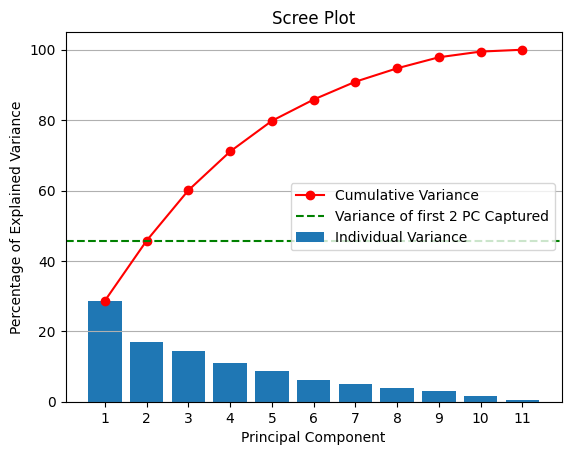

In [278]:
### YOUR CODE HERE ###
plot_y = [val * 100 for val in pca.explained_variance_ratio_]
plot_x = range(1, len(plot_y) + 1)
plt.bar(plot_x, plot_y, label = 'Individual Variance')

exp_var = [val * 100 for val in pca.explained_variance_ratio_]
plot_y2 = [sum(exp_var[:i+1]) for i in range(len(exp_var))]
plot_x2 = range(1, len(plot_y2) + 1)
plt.plot(plot_x2, plot_y2, marker="o", label = 'Cumulative Variance', color = 'red')
plt.axhline(y=plot_y2[1], color='g', linestyle='--', label='Variance of first 2 PC Captured')


plt.xlabel("Principal Component")
plt.ylabel("Percentage of Explained Variance")


plt.title("Scree Plot")
plt.legend()
plt.grid(axis="y")
plt.xticks(plot_x)

plt.show()

## Part 5.4: 2D Scatter Plots with the First 2 PCs [7 Marks]

As an attempt to describe the dataset to using only the first two PCs, we now use the first 2 PCs to plot a scatter plot with various wine qualities. Here are the steps:


1. Set 6 different colors for the 6 different wine qualities.
  - `colors = [your favourite 6 colors]`
  - we want the colors to correspond to increasing wine quality. In other words,
    - `colors[0]` --> lowest quality;
    - `colors[-1]` --> highest quality


2. Create a DataFrame that includes the first two principal components and the corresponding target variable (wine quality).
In other words, the data should have 3 columns:
  - `Projected standardized data on PC1`,
  - `Projected standardized data on PC2`,
  - `Target`


3. **(Major Step)** Use a loop to plot the data points for each wine quality class in different colors, allowing for easy visual differentiation.

4. Label the x and y axes of the plot to indicate which principal components are being displayed. Add a title to the plot that includes the percentage of the variance explained by the first two principal components. Include a legend that explains the color coding of the different wine quality classes.

 **[5]**





After plotting, what can you say about this plot? **[1]**


What quality of wine could be the easiest to predict? What quality of wine would be the hardest to predict? **[1]**

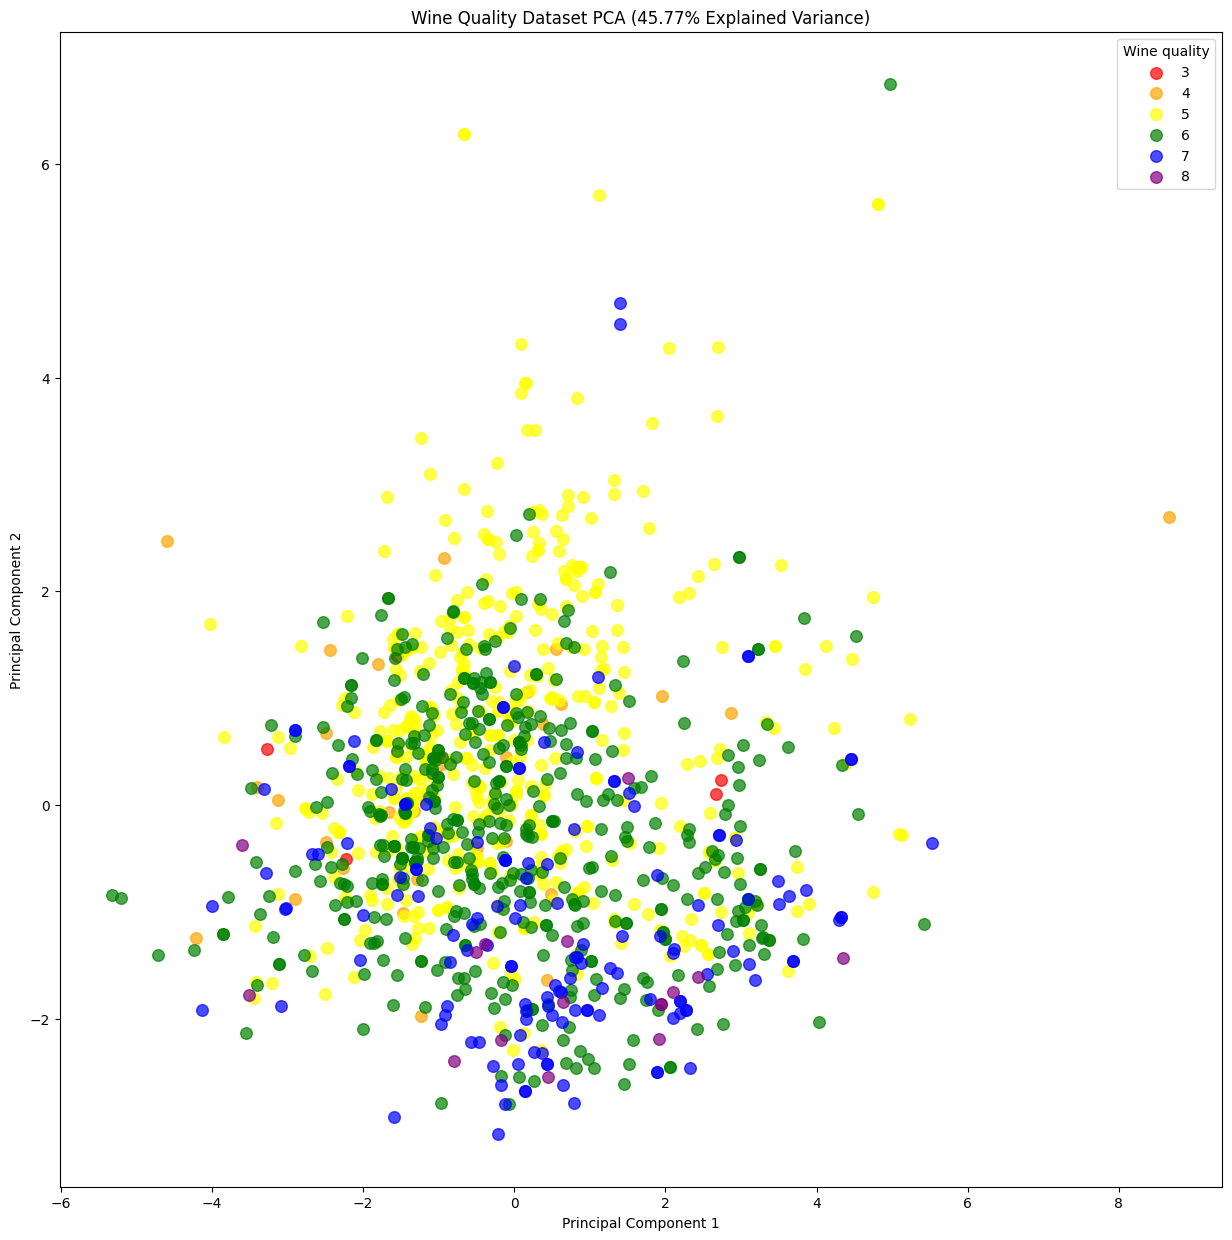

In [279]:
### YOUR CODE HERE ###
cev = sum(pca.explained_variance_ratio_[:2]) * 100

colors = ["red", "orange", "yellow", "green", "blue", "purple"]

pca_2d_df = pd.DataFrame(pca_res[:, :2], columns=["PC1", "PC2"])
pca_2d_df["y"] = y_target

fig, ax = plt.subplots(figsize=(15, 15))
for i, target in enumerate(sorted(pca_2d_df["y"].unique())):
    subset = pca_2d_df[pca_2d_df["y"] == target]
    ax.scatter(x=subset["PC1"], y=subset["PC2"], s=70, alpha=0.7, c=colors[i], label=target)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"Wine Quality Dataset PCA ({cev:.2f}% Explained Variance)")

ax.legend(title="Wine quality")
plt.show()

**After plotting, what can you say about this plot? [1]**

**What quality of wine could be the easiest to predict? What quality of wine would be the hardest to predict? [1]**

All of the wine regardless of quality is overlapping and clustering in one region in the center. By observing the plot, it can be seen that the most tightly clustered class of wine is quality 6 wine. Therefore wine of quality 6 would be the easiest to predict.



## Part 5.5: 3D Plot by the First 3 PCs [12 Marks]

By increasing the variance captured, we could add in one more dimension by introducing the PC3 into the plot.

Now plot the 3D scatter plot using `ax.scatter()`. **[5]**




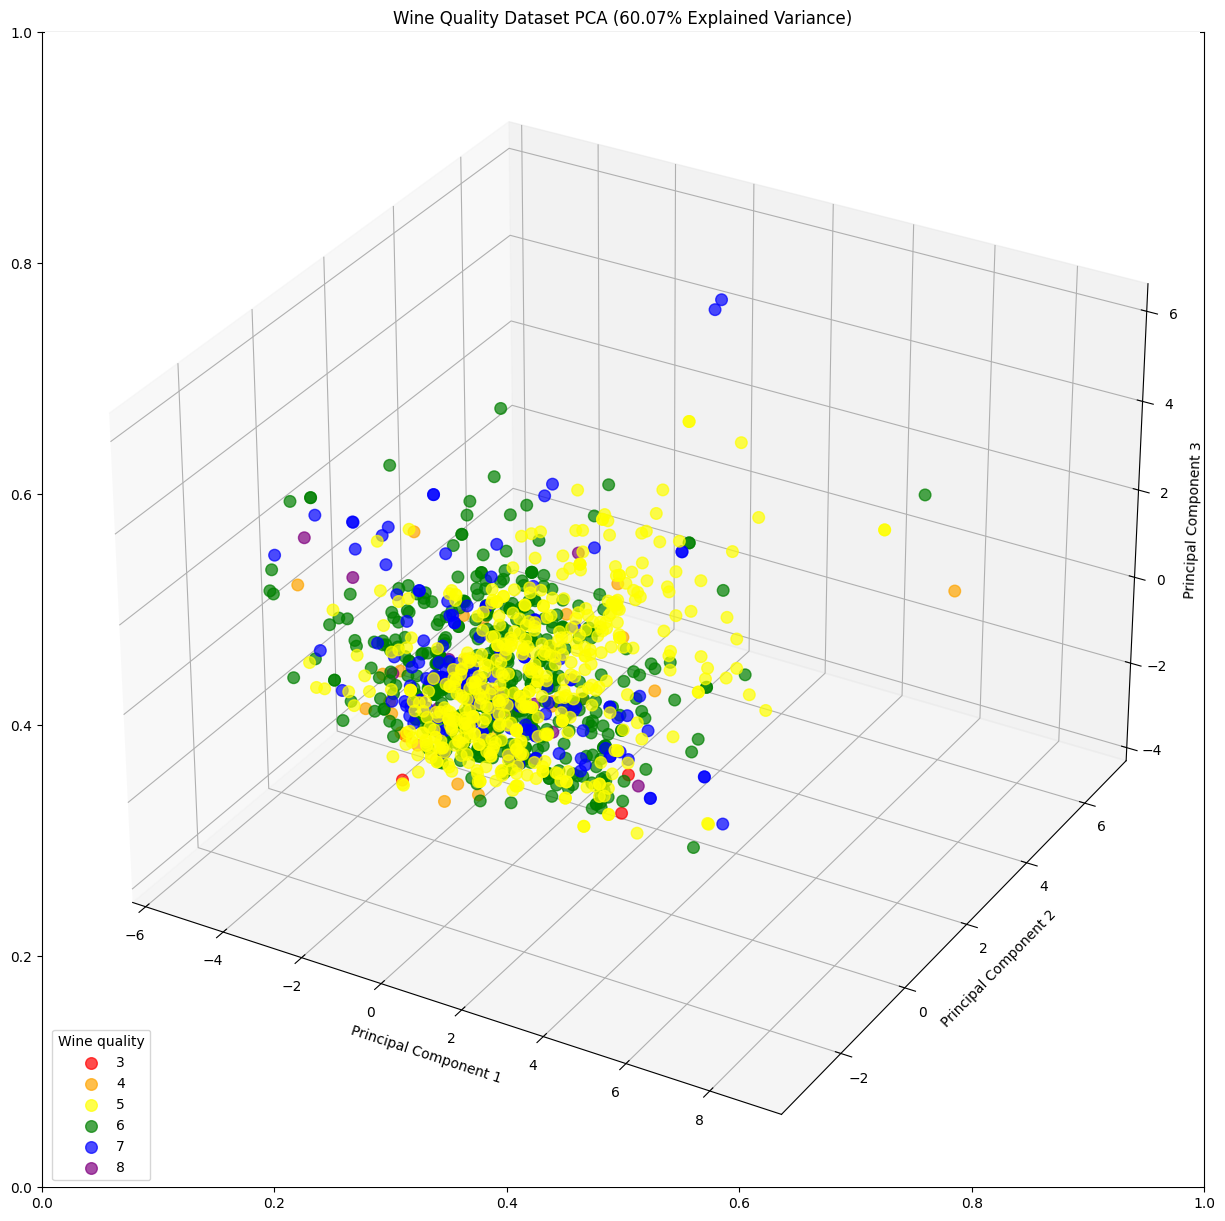

In [280]:
### YOUR CODE HERE ###
cev = sum(pca.explained_variance_ratio_[:3]) * 100

colors = ["red", "orange", "yellow", "green", "blue", "purple"]

pca_3d_df = pd.DataFrame(pca_res[:, :3], columns=["PC1", "PC2", "PC3"])
pca_3d_df["y"] = y_target

fig, ax= plt.subplots(figsize=(15,15))
ax = fig.add_subplot(projection="3d")

for i, target in enumerate(sorted(pca_3d_df["y"].unique())):
    subset = pca_3d_df[pca_3d_df["y"] == target]
    ax.scatter(xs=subset["PC1"], ys=subset["PC2"], zs=subset["PC3"], s=70, alpha=0.7, c=colors[i], label=target)

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.title(f"Wine Quality Dataset PCA ({cev:.2f}% Explained Variance)")

ax.legend(title="Wine quality", loc = 'lower left')
plt.show()

This still looks a little messy, let's try to make the plot interactive by using [plotly](https://plotly.com/python/plotly-express/). Let's import the `plotly.express` package first!



In [281]:
import plotly.express as px


Next, we'll use [`px.scatter_3d()`](https://plotly.com/python-api-reference/generated/plotly.express.scatter_3d) to create a 3D scatter plot. We need to pass the DataFrame we just created in part 5.5 `pca_3d_df` and specify which columns should be used for the x, y, and z axes. **[5]**

Once the plot is displayed, you can use your mouse to drag and rotate the plot interactively.



**How** does adding the PC3 help? **[1]**


**Which** quality of wine are easier to be predicted now with the addition of PC3? **[1]**


In [282]:
### YOUR CODE HERE ###
threeD_plot = px.scatter_3d(pca_3d_df, x='PC1', y='PC2', z='PC3', color='y', color_discrete_sequence=colors, title=f'Interactive 3D PCA Plot')
threeD_plot.show()

**How does adding the PC3 help? [1]**
**Which quality of wine are easier to be predicted now with the addition of PC3? [1]**

Adding the 3rd PC making the space 3 dimensional, shows clearer clusters as there is an aditional region for seperation. It is clear in the visual that some clusters are at a greater depth than others, there appears to be less overlapping. Now the easiest wine to predict would be quality 5 wine.

## Part 5.6: How Much of Each Feature are Captured by the PCs [12 Marks]


Now we know PCs could be used to predict wine qualities, but to get a meaningful analysis, we need to know **how much** of each features are captured by the PCs.

Loading Score is a score that represents the weight of each feature to the PC, higher Loading Score means higher weight.

Use the **Loading Score Plot for PC1, PC2, PC3** to find out **how much** of each features are captured by the PCs.







## Part 5.6a Create Loading DataFrame [5 Marks]

First, and most importantly we need to create a DataFrame that is made by `eigen Vectors * np.sqrt(eigen Values)`

**Why** do we multiply the eigenvectors by the square root of their corresponding eigenvalues to compute the loadings? **[1]**

**How** does this operation help in interpreting the contribution of each original feature to the principal components? **[1]**










Use the result of `eigen Vectors * np.sqrt(eigen Values)` to create the loading dataframe.

Create the DataFrame with the required values and with the same columns as the original dataset. **[3]**




**Why do we multiply the eigenvectors by the square root of their corresponding eigenvalues to compute the loadings? [1]**
**How does this operation help in interpreting the contribution of each original feature to the principal components? [1]**
Eigenvectors represent direction while eigenvalues represent a magnitude. Taking the square root of an eigenvalue returns the initial value and multiplying by the eigenvectors returns the direction. By conducting this operation for the loading datafrane, it helps us see the effect of a single component and in what way it impacts it.

In [283]:
### YOUR CODE HERE ###
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_),
    columns=[f"PC{i}" for i in range(1, len(x_data.columns) + 1)],
    index=x_data.columns)
loadings.head()

PC1       PC2       PC3       PC4       PC5       PC6  \
fixed acidity     0.862609 -0.140302 -0.153582 -0.259925 -0.095364 -0.084355   
volatile acidity -0.403710  0.395954 -0.556867  0.085107  0.252229 -0.339555   
citric acid       0.817708 -0.200876  0.309789 -0.070274 -0.076067 -0.072924   
residual sugar    0.310156  0.345875  0.114656 -0.448464  0.686636 -0.020252   
chlorides         0.399670  0.209961 -0.065966  0.718697  0.265050 -0.260270   

                       PC7       PC8       PC9      PC10      PC11  
fixed acidity     0.258366  0.121850  0.101867 -0.120876  0.152149  
volatile acidity  0.394982  0.054160 -0.060428  0.149167  0.002582  
citric acid      -0.070860  0.244920 -0.203733  0.270525 -0.012981  
residual sugar   -0.229118 -0.206454  0.004928  0.042353  0.044352  
chlorides        -0.281619  0.212238  0.049392 -0.106145  0.011283


## Part 5.6b: Plot Loading Score Plot (Bar Plot) [7 Marks]

Next, we'll set up the Loading Score Plot, which is nothing but a Bar Plot for each PC.

We'll create **a bar plot for each PC** we wish to analyze.

In each of the bar plots, please make the Y-axis represents the loading scores we just created (indicating the contribution of each feature to the PC), and the X-axis represents the features. **[5]**



Based on the plot, with high `alcohol` and `free sulfur dioxide` values, a lower or higher PC3 value should be expected? **[1]**

Would that mean a higher quality or lower quality wine from this part and the 3D plot? **[1]**


['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11']


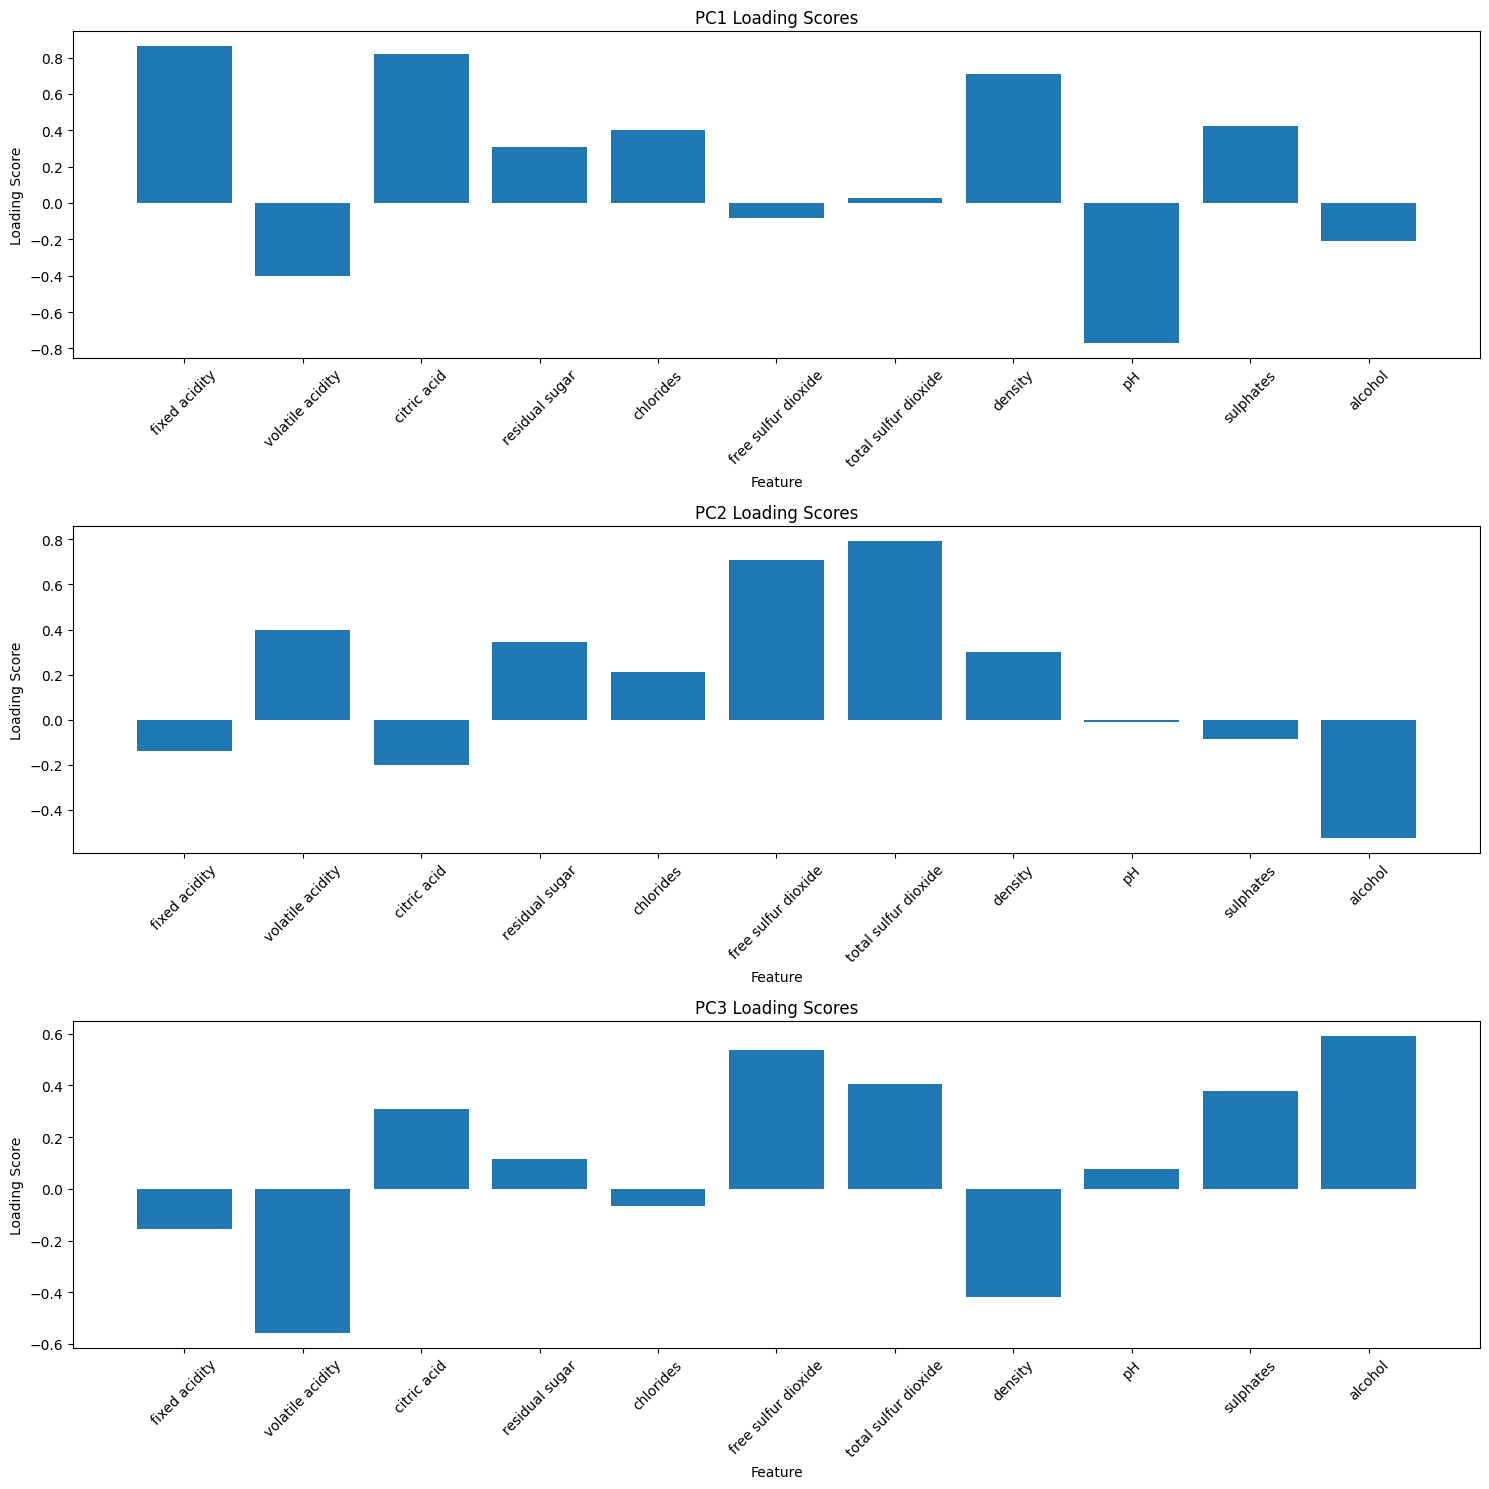

In [284]:
### YOUR CODE HERE ###
PC_list = (loadings.columns).tolist()
print(PC_list)
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
for i in range(0,3):
  axes[i].bar(loadings.index, loadings[PC_list[i]])
  axes[i].tick_params(axis='x', labelrotation=45)
  axes[i].set_title(f"{PC_list[i]} Loading Scores")
  axes[i].set_xlabel("Feature")
  axes[i].set_ylabel("Loading Score")

plt.tight_layout()
plt.show()


**Based on the plot, with high alcohol and free sulfur dioxide values, a lower or higher PC3 value should be expected? [1]**
**Would that mean a higher quality or lower quality wine from this part and the 3D plot? [1]**

Based on the plots, it appears that if there is high alcohol and sulfur free values, we expect that PC3 value will also be high.
That will mean that there will be a higher wine quality from this part of the 3d Plot.

# References

Understanding PCA and SVD:

1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:

1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/

2. https://www.value-at-risk.net/principal-component-analysis/


3. https://medium.com/towards-data-science/5-pca-visualizations-you-must-try-on-your-next-data-science-project-148ec3d31e4d


Flight Delays Data:

1. https://www.kaggle.com/datasets/gabrielluizone/us-domestic-flights-delay-prediction-2013-2018


Wine Quality Data:
1. https://www.kaggle.com/datasets/yasserh/wine-quality-dataset